In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, count
from pyspark.ml.feature import StringIndexer, MinMaxScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Initialize Spark session
spark = SparkSession.builder \
    .appName("HR Analytics") \
    .getOrCreate()

# Adjust log level to minimize unnecessary messages (optional)
spark.sparkContext.setLogLevel("ERROR")


In [5]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("HR Analytics") \
    .getOrCreate()

# Load CSV into a PySpark DataFrame
employee_data = spark.read.csv("C:/Users/basan/Downloads/WA_Fn-UseC_-HR-Employee-Attrition (2).csv", header=True, inferSchema=True)

# Show the first few rows of the DataFrame
employee_data.show(5)

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalanc

In [6]:
# Show top 5 rows of the DataFrame
employee_data.show(5)

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalanc

In [9]:
from pyspark.sql.functions import desc

# Assuming you want to order by a column like 'EmployeeNumber' descending
sorted_employee_data = employee_data.orderBy(desc('EmployeeNumber'))

# Show bottom 5 rows of the DataFrame
sorted_employee_data.limit(5).show()


+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalanc

# 1.Computing size of data sets

### Number of rows
num_rows = employee_data.count()

## Number of columns
num_cols = len(employee_data.columns)

print(f"The shape of the DataFrame: ({num_rows}, {num_cols})")

In [11]:
num_rows = employee_data.count()
print(f"Number of Rows in the DataFrame: {num_rows}")

Number of Rows in the DataFrame: 1470


In [12]:
num_cols = len(employee_data.columns)
print(f"Number of Columns in the DataFrame: {num_cols}")


Number of Columns in the DataFrame: 35


In [14]:
# Print column labels in the dataset in column order
print("Column labels in the dataset in column order:")
for column in employee_data.columns:
    print(column)

Column labels in the dataset in column order:
Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [15]:
from pyspark.sql.functions import col, isnan, when, count

# Check for non-null and NaN values in each column
employee_data.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in employee_data.columns]).show()

+---+---------+--------------+---------+----------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+-------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|BusinessTravel|DailyRate|Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|YearsAtCompany|YearsInCurrentRole|YearsSinceLastPr

In [17]:
import pandas as pd
import numpy as np

# Assuming employee_data is a PySpark DataFrame
# Convert to Pandas DataFrame for operations not directly supported in PySpark
employee_data_pd = employee_data.toPandas()

# Select numerical columns
numerical_columns = employee_data_pd.select_dtypes(include=[np.number]).columns

# Sample 5 rows from the numerical columns
sample_data = employee_data_pd[numerical_columns].sample(5)

# Apply styling
styled_sample = sample_data.style.set_properties(**{'background-color': '#E9F6E2', 'color': 'black', 'border-color': '#8b8c8c'})

# Display styled DataFrame
styled_sample

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
13,34,1346,19,2,1,18,2,93,3,1,4,2661,8758,0,11,3,3,80,1,3,2,3,2,2,1,2
258,51,833,1,3,1,353,3,96,3,1,4,2723,23231,1,11,3,2,80,0,1,0,2,1,0,0,0
108,25,1280,7,1,1,143,4,64,2,1,4,2889,26897,1,11,3,3,80,2,2,2,3,2,2,2,1
1268,53,661,1,4,1,1775,1,60,2,4,3,12965,22308,4,20,4,4,80,3,27,2,2,3,2,0,2
277,38,322,7,2,1,382,1,44,4,2,1,5605,19191,1,24,4,3,80,1,8,3,3,8,0,7,7


In [18]:
from pyspark.sql.functions import when

# Assuming employee_data is your PySpark DataFrame
employee_data = employee_data.withColumn("Education", 
                                         when(employee_data["Education"] == 1, "Below College")
                                         .when(employee_data["Education"] == 2, "College")
                                         .when(employee_data["Education"] == 3, "Bachelor")
                                         .when(employee_data["Education"] == 4, "Master")
                                         .when(employee_data["Education"] == 5, "Doctor")
                                         .otherwise(employee_data["Education"]))

# Show updated DataFrame
employee_data.show(5)


+---+---------+-----------------+---------+--------------------+----------------+-------------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|    Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLi

In [19]:
from pyspark.sql.functions import when

# Define replacement mapping
replacement_map = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

# Apply replacement using withColumn and when function
employee_data = employee_data.withColumn("JobInvolvement", 
                                         when(employee_data["JobInvolvement"] == 1, replacement_map[1])
                                         .when(employee_data["JobInvolvement"] == 2, replacement_map[2])
                                         .when(employee_data["JobInvolvement"] == 3, replacement_map[3])
                                         .when(employee_data["JobInvolvement"] == 4, replacement_map[4])
                                         .otherwise(employee_data["JobInvolvement"]))

# Show updated DataFrame
employee_data.show(5)


+---+---------+-----------------+---------+--------------------+----------------+-------------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|    Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLi

In [20]:
from pyspark.sql.functions import when

# Define replacement mapping
replacement_map = {
    1: "Entry Level",
    2: "Junior Level",
    3: "Mid Level",
    4: "Senior Level",
    5: "Executive Level"
}

# Apply replacement using withColumn and when function
employee_data = employee_data.withColumn("JobLevel", 
                                         when(employee_data["JobLevel"] == 1, replacement_map[1])
                                         .when(employee_data["JobLevel"] == 2, replacement_map[2])
                                         .when(employee_data["JobLevel"] == 3, replacement_map[3])
                                         .when(employee_data["JobLevel"] == 4, replacement_map[4])
                                         .when(employee_data["JobLevel"] == 5, replacement_map[5])
                                         .otherwise(employee_data["JobLevel"]))

# Show updated DataFrame
employee_data.show(5)


+---+---------+-----------------+---------+--------------------+----------------+-------------+--------------+-------------+--------------+-----------------------+------+----------+--------------+------------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|    Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|    JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYea

In [21]:
from pyspark.sql.functions import when

# Define replacement mapping
replacement_map = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

# Apply replacement using withColumn and when function
employee_data = employee_data.withColumn("JobSatisfaction", 
                                         when(employee_data["JobSatisfaction"] == 1, replacement_map[1])
                                         .when(employee_data["JobSatisfaction"] == 2, replacement_map[2])
                                         .when(employee_data["JobSatisfaction"] == 3, replacement_map[3])
                                         .when(employee_data["JobSatisfaction"] == 4, replacement_map[4])
                                         .otherwise(employee_data["JobSatisfaction"]))

# Show updated DataFrame
employee_data.show(5)


+---+---------+-----------------+---------+--------------------+----------------+-------------+--------------+-------------+--------------+-----------------------+------+----------+--------------+------------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|    Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|    JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYea

In [22]:
from pyspark.sql.functions import when

# Define replacement mapping
replacement_map = {
    1: "Low",
    2: "Good",
    3: "Excellent",
    4: "Outstanding"
}

# Apply replacement using withColumn and when function
employee_data = employee_data.withColumn("PerformanceRating", 
                                         when(employee_data["PerformanceRating"] == 1, replacement_map[1])
                                         .when(employee_data["PerformanceRating"] == 2, replacement_map[2])
                                         .when(employee_data["PerformanceRating"] == 3, replacement_map[3])
                                         .when(employee_data["PerformanceRating"] == 4, replacement_map[4])
                                         .otherwise(employee_data["PerformanceRating"]))

# Show updated DataFrame
employee_data.show(5)


+---+---------+-----------------+---------+--------------------+----------------+-------------+--------------+-------------+--------------+-----------------------+------+----------+--------------+------------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|    Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|    JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYea

In [23]:
from pyspark.sql.functions import when

# Define replacement mapping
replacement_map = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}

# Apply replacement using withColumn and when function
employee_data = employee_data.withColumn("RelationshipSatisfaction", 
                                         when(employee_data["RelationshipSatisfaction"] == 1, replacement_map[1])
                                         .when(employee_data["RelationshipSatisfaction"] == 2, replacement_map[2])
                                         .when(employee_data["RelationshipSatisfaction"] == 3, replacement_map[3])
                                         .when(employee_data["RelationshipSatisfaction"] == 4, replacement_map[4])
                                         .otherwise(employee_data["RelationshipSatisfaction"]))

# Show updated DataFrame
employee_data.show(5)


+---+---------+-----------------+---------+--------------------+----------------+-------------+--------------+-------------+--------------+-----------------------+------+----------+--------------+------------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|    Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|    JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYea

In [24]:
from pyspark.sql.functions import when

# Define replacement mapping
replacement_map = {
    1: "Bad",
    2: "Good",
    3: "Better",
    4: "Best"
}

# Apply replacement using withColumn and when function
employee_data = employee_data.withColumn("WorkLifeBalance", 
                                         when(employee_data["WorkLifeBalance"] == 1, replacement_map[1])
                                         .when(employee_data["WorkLifeBalance"] == 2, replacement_map[2])
                                         .when(employee_data["WorkLifeBalance"] == 3, replacement_map[3])
                                         .when(employee_data["WorkLifeBalance"] == 4, replacement_map[4])
                                         .otherwise(employee_data["WorkLifeBalance"]))

# Show updated DataFrame
employee_data.show(5)


+---+---------+-----------------+---------+--------------------+----------------+-------------+--------------+-------------+--------------+-----------------------+------+----------+--------------+------------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|    Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|    JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYea

## ENLISTING CATEGORICAL FEATURES

In [26]:
from pyspark.sql.types import StringType

# Get columns and their data types from the schema
schema = employee_data.schema

# Filter columns that are StringType (string/object columns)
string_columns = [col.name for col in schema if isinstance(col.dataType, StringType)]

# Sample 5 rows from the string columns
sample_data = employee_data.select(string_columns).sample(False, 0.1).limit(5)

# Convert PySpark DataFrame to Pandas DataFrame for styling (if necessary)
sample_data_pd = sample_data.toPandas()

# Apply styling
styled_sample = sample_data_pd.style.set_properties(**{'background-color': '#E9F6E2', 'color': 'black', 'border-color': '#8b8c8c'})

# Display styled DataFrame (if running in a notebook environment)
styled_sample

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Yes,Travel_Rarely,Sales,College,Life Sciences,Female,High,Junior Level,Sales Executive,Very High,Single,Y,Yes,Excellent,Low,Bad
1,No,Travel_Rarely,Research & Development,Bachelor,Medical,Female,Very High,Entry Level,Laboratory Technician,Low,Married,Y,Yes,Outstanding,Low,Good
2,No,Travel_Rarely,Research & Development,Below College,Life Sciences,Male,High,Entry Level,Research Scientist,High,Divorced,Y,No,Excellent,Very High,Good
3,No,Travel_Rarely,Sales,Bachelor,Marketing,Female,High,Entry Level,Sales Representative,Very High,Married,Y,No,Excellent,Low,Better
4,No,Travel_Rarely,Research & Development,Master,Medical,Male,High,Entry Level,Research Scientist,Medium,Single,Y,No,Excellent,Medium,Better


## CHECK FOR MISSING VALUES

In [27]:
from pyspark.sql.functions import col, when, count

# Calculate the number of missing values in each column
missing_df = employee_data.select([count(when(col(c).isNull(), c)).alias(c) for c in employee_data.columns])

# Convert the result to a Pandas DataFrame for display
missing_df_pd = missing_df.toPandas().transpose()
missing_df_pd.columns = ['Total No. of Missing Values']
missing_df_pd["% of Missing Values"] = round((missing_df_pd["Total No. of Missing Values"] / employee_data.count()) * 100, 2)

# Display the missing values DataFrame
missing_df_pd

,Total No. of Missing Values,% of Missing Values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


## DESCRIPTIVE ANALYSIS ON NUMERICAL ATTRIBUTES

In [28]:
summary_df = employee_data.describe().toPandas().transpose()

# Display the transposed summary DataFrame
summary_df

,0,1,2,3,4
summary,count,mean,stddev,min,max
Age,1470,36.923809523809524,9.135373489136729,18,60
Attrition,1470,None,None,No,Yes
BusinessTravel,1470,None,None,Non-Travel,Travel_Rarely
DailyRate,1470,802.4857142857143,403.50909994352804,102,1499
Department,1470,None,None,Human Resources,Sales
DistanceFromHome,1470,9.19251700680272,8.10686443566608,1,29
Education,1470,None,None,Bachelor,Master
EducationField,1470,None,None,Human Resources,Technical Degree
EmployeeCount,1470,1.0,0.0,1,1


## DROP UNNECESSARY COLUMNS

In [30]:
columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

# Drop columns from employee_data
employee_data = employee_data.drop(*columns_to_drop)

# Show the updated DataFrame schema
employee_data.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: string (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: string (nullable = true)
 |-- JobLevel: string (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: string (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- OverTime: string (nullable = true)
 |-- PercentSalaryHike: integer (nullable = true)
 |-- PerformanceRating: string (nullable = true)
 |-- RelationshipS

In [31]:
employee_data.show(5)

+---+---------+-----------------+---------+--------------------+----------------+-------------+--------------+-----------------------+------+----------+--------------+------------+--------------------+---------------+-------------+-------------+-----------+------------------+--------+-----------------+-----------------+------------------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|    Education|EducationField|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|    JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|YearsAtCompany|YearsInCurrentRole|YearsSinceLastPromotion|YearsWithCurrManager|
+-

In [32]:
# Count the number of rows in the DataFrame
num_rows = employee_data.count()
print("Number of Rows in the dataframe:", num_rows)


Number of Rows in the dataframe: 1470


In [33]:
# Get the list of column names and count the number of columns
num_columns = len(employee_data.columns)
print("Number of Columns in the dataframe:", num_columns)


Number of Columns in the dataframe: 31


In [34]:
# Print column labels in the dataset in column order
print("Column labels in the dataset in column order:")
for column in employee_data.columns:
    print(column)


Column labels in the dataset in column order:
Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


## DESCRIPTIVE ANALYSIS ON CATEGORICAL ATTRIBUTES

In [36]:
from pyspark.sql.functions import col

# Select string/object columns
string_columns = [col_name for col_name, dtype in employee_data.dtypes if dtype == 'string']

# Compute summary statistics for selected columns
summary_df = employee_data.select(string_columns).describe()

# Transpose the summary DataFrame for better readability
summary_df = summary_df.toPandas().transpose()

# Display the transposed summary DataFrame
print(summary_df)

                              0     1       2                          3  \
summary                   count  mean  stddev                        min   
Attrition                  1470  None    None                         No   
BusinessTravel             1470  None    None                 Non-Travel   
Department                 1470  None    None            Human Resources   
Education                  1470  None    None                   Bachelor   
EducationField             1470  None    None            Human Resources   
Gender                     1470  None    None                     Female   
JobInvolvement             1470  None    None                       High   
JobLevel                   1470  None    None                Entry Level   
JobRole                    1470  None    None  Healthcare Representative   
JobSatisfaction            1470  None    None                       High   
MaritalStatus              1470  None    None                   Divorced   
OverTime    

## CHECKING UNIQUE VALUE OF CATEGORICAL ATTRIBUTES

In [37]:
from pyspark.sql.functions import col, countDistinct

# Calculate the number of unique values in each column
for column in employee_data.columns:
    num_unique = employee_data.agg(countDistinct(col(column))).collect()[0][0]
    print(f"{column} - Number of unique values : {num_unique}")
    print("=============================================================")


Age - Number of unique values : 43
Attrition - Number of unique values : 2
BusinessTravel - Number of unique values : 3
DailyRate - Number of unique values : 886
Department - Number of unique values : 3
DistanceFromHome - Number of unique values : 29
Education - Number of unique values : 5
EducationField - Number of unique values : 6
EnvironmentSatisfaction - Number of unique values : 4
Gender - Number of unique values : 2
HourlyRate - Number of unique values : 71
JobInvolvement - Number of unique values : 4
JobLevel - Number of unique values : 5
JobRole - Number of unique values : 9
JobSatisfaction - Number of unique values : 4
MaritalStatus - Number of unique values : 3
MonthlyIncome - Number of unique values : 1349
MonthlyRate - Number of unique values : 1427
NumCompaniesWorked - Number of unique values : 10
OverTime - Number of unique values : 2
PercentSalaryHike - Number of unique values : 15
PerformanceRating - Number of unique values : 2
RelationshipSatisfaction - Number of uniq

In [40]:
from pyspark.sql.functions import col

# Initialize an empty list to store categorical feature names
categorical_features = []

# Iterate through columns to identify and analyze categorical features
for column in employee_data.columns:
    # Check if the column is of string type and has 30 or fewer unique values
    if str(employee_data.schema[column].dataType) == 'StringType' and employee_data.select(column).distinct().count() <= 30:
        # Add the column to the list of categorical features
        categorical_features.append(column)
        
        # Print unique values and value counts for the categorical column
        print(f"{column} :")
        employee_data.groupBy(column).count().orderBy('count', ascending=False).show(truncate=False)
        print("====================================================================================")

# Remove 'Attrition' from categorical_features if it was added accidentally
if 'Attrition' in categorical_features:
    categorical_features.remove('Attrition')

# Print the identified categorical feature names
print("Categorical Features:", categorical_features)

Categorical Features: []


## EXPLORATORY DATA ANALYSIS

##VISUALIZING THE EMPLOYEE ATTRITION RATE.

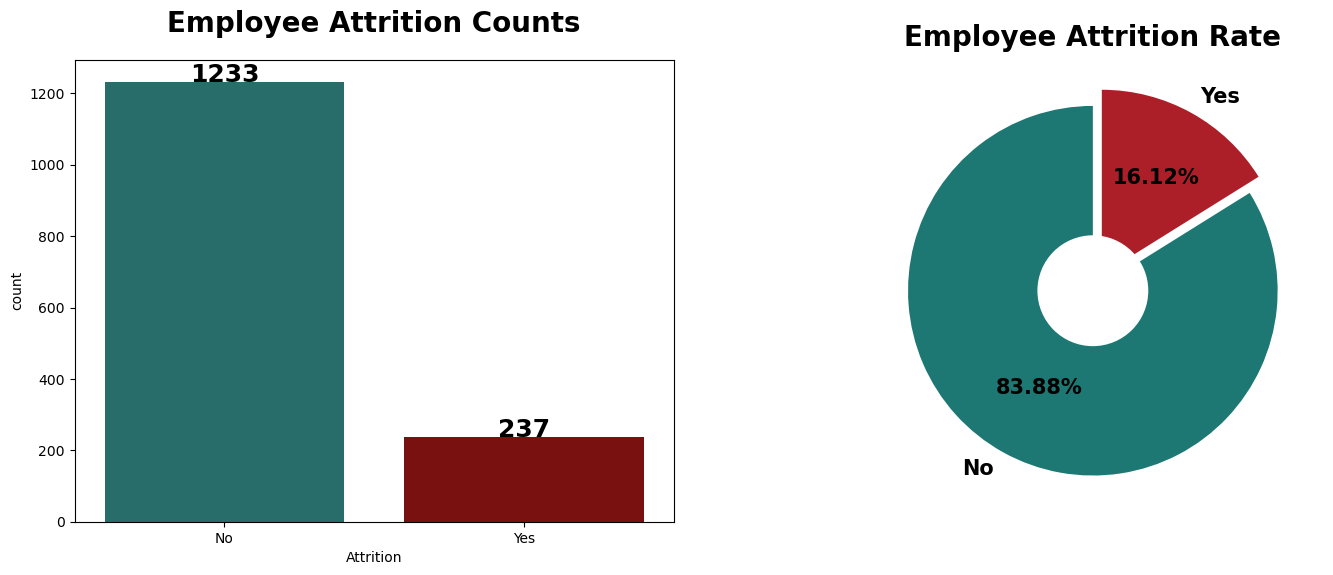

In [42]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# Assuming `spark` is your SparkSession and `employee_data` is your PySpark DataFrame

# Calculate attrition counts
attrition_counts = employee_data.groupBy("Attrition").count().orderBy("Attrition")

# Convert to Pandas DataFrame for visualization
attrition_counts_pd = attrition_counts.toPandas()

# Plotting
plt.figure(figsize=(17, 6))

# Bar plot for attrition counts
plt.subplot(1, 2, 1)
sns.barplot(x="Attrition", y="count", data=attrition_counts_pd, palette=["#1d7874", "#8B0000"])
plt.title("Employee Attrition Counts", fontweight="black", size=20, pad=20)
for i, v in enumerate(attrition_counts_pd["count"]):
    plt.text(i, v, v, ha="center", fontweight='black', fontsize=18)

# Pie chart for attrition rate
plt.subplot(1, 2, 2)
plt.pie(attrition_counts_pd["count"], labels=attrition_counts_pd["Attrition"], autopct="%.2f%%",
        textprops={"fontweight": "black", "size": 15}, colors=["#1d7874", "#AC1F29"], explode=[0, 0.1], startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate", fontweight="black", size=20, pad=10)

plt.show()



## ANALYZING EMPLOYEE ATTRITION BY GENDER.

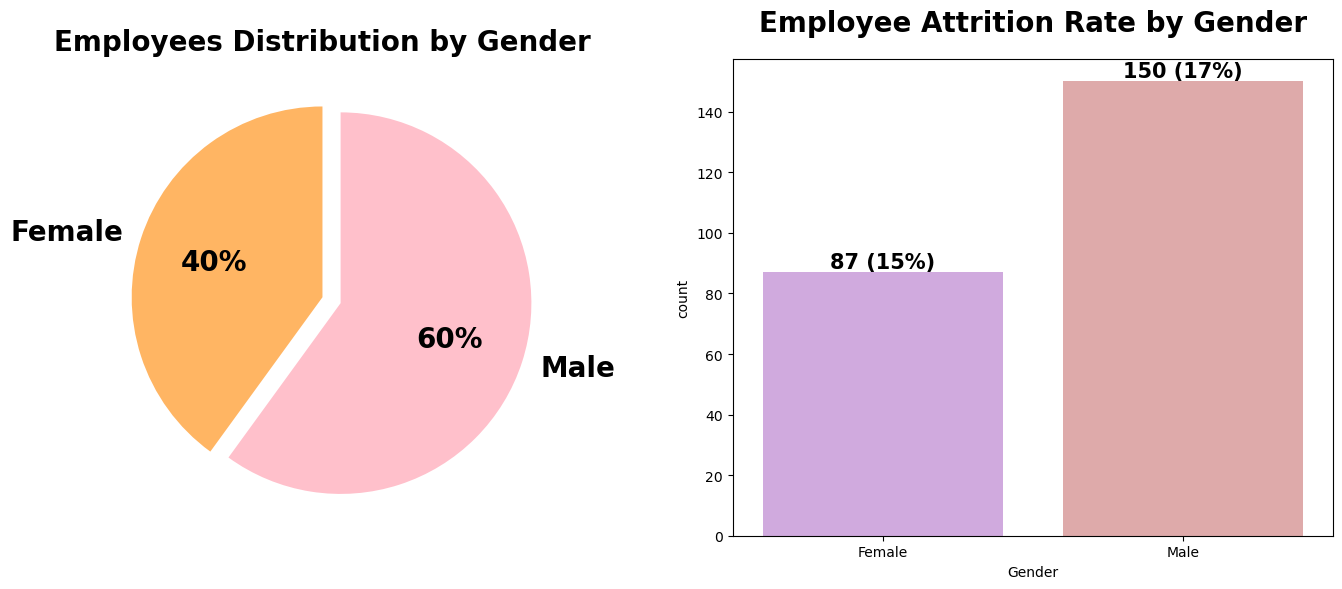

In [43]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `spark` is your SparkSession and `employee_data` is your PySpark DataFrame

# Calculate total employees by gender
gender_counts = employee_data.groupBy("Gender").count().orderBy("Gender")

# Convert to Pandas DataFrame for visualization
gender_counts_pd = gender_counts.toPandas()

# Calculate attrition rate by gender
attrition_counts = employee_data.filter(employee_data["Attrition"] == "Yes").groupBy("Gender").count().orderBy("Gender")
attrition_counts_pd = attrition_counts.toPandas()

# Plotting
plt.figure(figsize=(14, 6))

# Pie chart for employee distribution by gender
plt.subplot(1, 2, 1)
plt.title("Employees Distribution by Gender", fontweight="black", size=20)
plt.pie(gender_counts_pd["count"], autopct="%.0f%%", labels=gender_counts_pd["Gender"],
        textprops={"fontweight": "black", "size": 20}, explode=[0, 0.1], startangle=90,
        colors=["#ffb563", "#FFC0CB"])

# Bar plot for attrition rate by gender
plt.subplot(1, 2, 2)
plt.title("Employee Attrition Rate by Gender", fontweight="black", size=20, pad=20)
sns.barplot(x=attrition_counts_pd["Gender"], y=attrition_counts_pd["count"], palette=["#D4A1E7", "#E7A1A1"])
for index, value in enumerate(attrition_counts_pd["count"]):
    attrition_rate = (value / gender_counts_pd.loc[index, "count"]) * 100
    plt.text(index, value, f"{value} ({attrition_rate:.0f}%)", ha="center", va="bottom", size=15, fontweight="black")
plt.tight_layout()

plt.show()


## ANALYZING EMPLOYEE ATTRITION BY AGE.

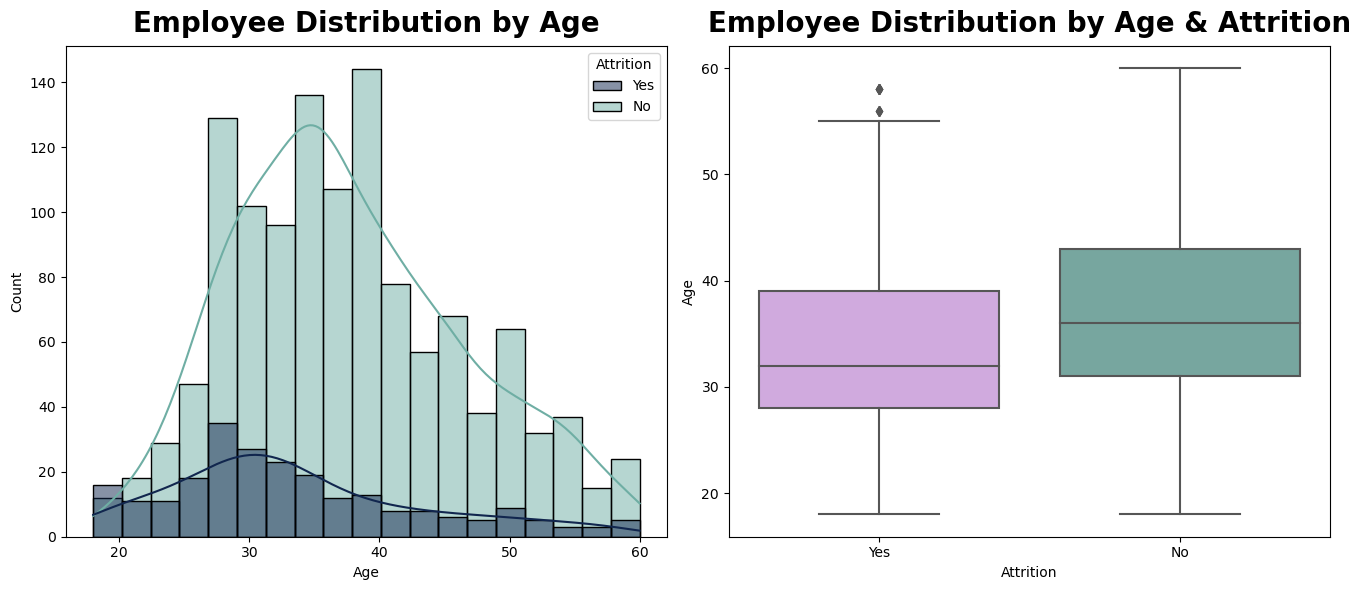

In [44]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `spark` is your SparkSession and `employee_data` is your PySpark DataFrame

# Convert PySpark DataFrame to Pandas for visualization
employee_data_pd = employee_data.toPandas()

# Plotting
plt.figure(figsize=(13.5, 6))

# Histogram plot for employee distribution by age and attrition
plt.subplot(1, 2, 1)
sns.histplot(x="Age", hue="Attrition", data=employee_data_pd, kde=True, palette=["#11264e", "#6faea4"])
plt.title("Employee Distribution by Age", fontweight="black", size=20, pad=10)

# Box plot for employee distribution by age and attrition
plt.subplot(1, 2, 2)
sns.boxplot(x="Attrition", y="Age", data=employee_data_pd, palette=["#D4A1E7", "#6faea4"])
plt.title("Employee Distribution by Age & Attrition", fontweight="black", size=20, pad=10)

plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY BUSINESS TRAVEL.

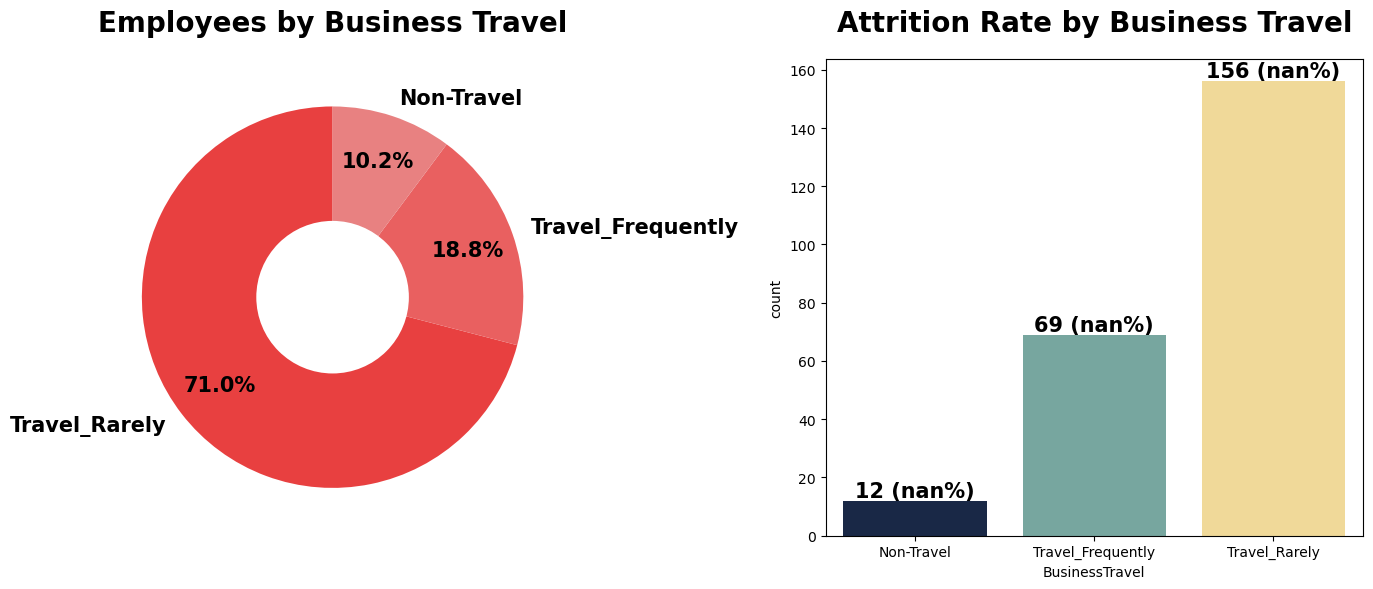

In [45]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `spark` is your SparkSession and `employee_data` is your PySpark DataFrame

# Convert PySpark DataFrame to Pandas for visualization
employee_data_pd = employee_data.toPandas()

# Plotting
plt.figure(figsize=(14, 6))

# Pie chart for employees by business travel
plt.subplot(1, 2, 1)
value_1 = employee_data_pd["BusinessTravel"].value_counts()
plt.title("Employees by Business Travel", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
        colors=['#E84040', '#E96060', '#E88181'], textprops={"fontweight": "black", "size": 15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Bar plot for attrition rate by business travel
plt.subplot(1, 2, 2)
attrition_counts = employee_data.filter(employee_data["Attrition"] == "Yes").groupBy("BusinessTravel").count().orderBy("BusinessTravel")
attrition_counts_pd = attrition_counts.toPandas()
attrition_rate = (attrition_counts_pd["count"] / value_1) * 100
sns.barplot(x=attrition_counts_pd["BusinessTravel"], y=attrition_counts_pd["count"], palette=["#11264e", "#6faea4", "#FEE08B"])
plt.title("Attrition Rate by Business Travel", fontweight="black", size=20, pad=20)
for index, value in enumerate(attrition_counts_pd["count"]):
    plt.text(index, value, f"{value} ({attrition_rate[index]:.0f}%)", ha="center", va="bottom",
             size=15, fontweight="black")
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY DEPARTMENT.

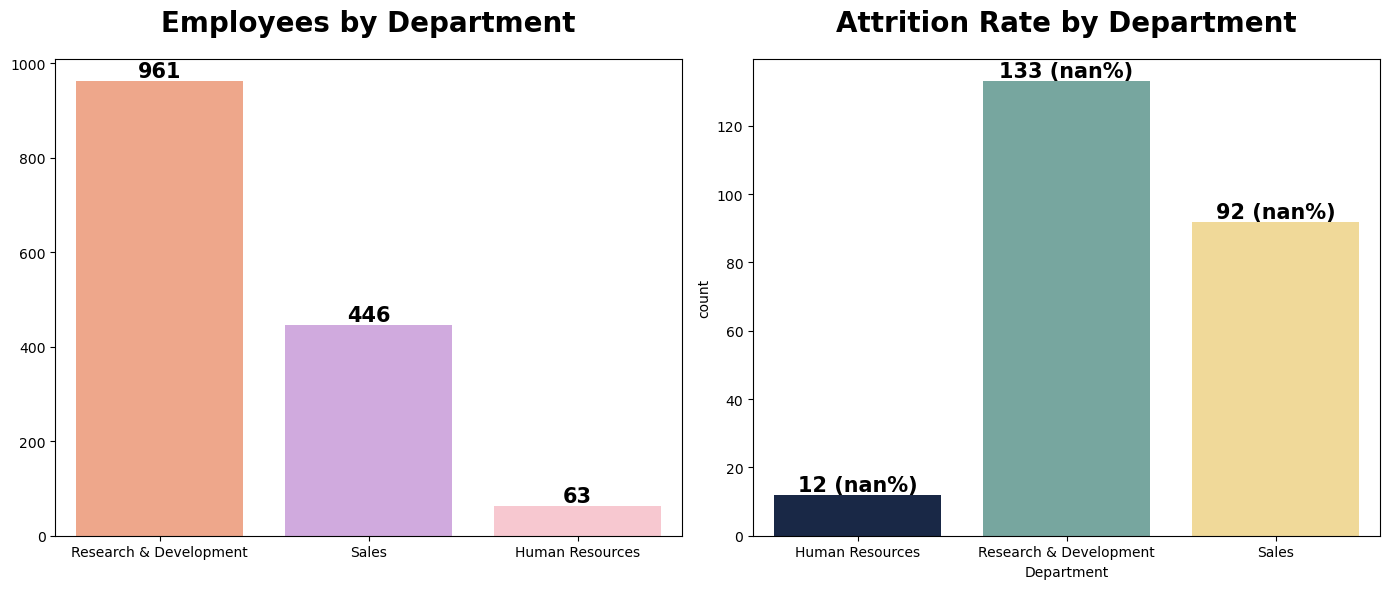

In [47]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `spark` is your SparkSession and `employee_data` is your PySpark DataFrame

# Convert PySpark DataFrame to Pandas for visualization
employee_data_pd = employee_data.toPandas()

# Plotting
plt.figure(figsize=(14, 6))

# Bar plot for employees by department
plt.subplot(1, 2, 1)
value_1 = employee_data_pd["Department"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, palette=["#FFA07A", "#D4A1E7", "#FFC0CB"])
plt.title("Employees by Department", fontweight="black", size=20, pad=20)
for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=15)

# Bar plot for attrition rate by department
plt.subplot(1, 2, 2)
attrition_counts = employee_data.filter(employee_data["Attrition"] == "Yes").groupBy("Department").count().orderBy("Department")
attrition_counts_pd = attrition_counts.toPandas()
attrition_rate = (attrition_counts_pd["count"] / value_1) * 100
sns.barplot(x=attrition_counts_pd["Department"], y=attrition_counts_pd["count"], palette=["#11264e", "#6faea4", "#FEE08B"])
plt.title("Attrition Rate by Department", fontweight="black", size=20, pad=20)
for index, value in enumerate(attrition_counts_pd["count"]):
    plt.text(index, value, f"{value} ({attrition_rate[index]:.2f}%)", ha="center", va="bottom",
             size=15, fontweight="black")
plt.tight_layout()
plt.show()

## ANALYZING EMPLOYEE ATTRITION BY DAILY RATE.

In [55]:
# Import necessary libraries
from pyspark.sql import functions as F

# Calculate descriptive statistics for DailyRate column
daily_rate_stats = employee_data.describe("DailyRate").toPandas().transpose()

# Print the transposed DataFrame to display as desired
print(daily_rate_stats)


               0                  1                   2    3     4
summary    count               mean              stddev  min   max
DailyRate   1470  802.4857142857143  403.50909994352804  102  1499


In [56]:
from pyspark.sql import functions as F

# Define the bin edges and labels
bin_edges = [0, 500, 1000, 1500]
bin_labels = ['Low DailyRate', 'Average DailyRate', 'High DailyRate']

# Create a new column 'DailyRateGroup' based on binning
employee_data = employee_data.withColumn(
    'DailyRateGroup',
    F.when((F.col('DailyRate') >= bin_edges[0]) & (F.col('DailyRate') < bin_edges[1]), bin_labels[0])
    .when((F.col('DailyRate') >= bin_edges[1]) & (F.col('DailyRate') < bin_edges[2]), bin_labels[1])
    .when(F.col('DailyRate') >= bin_edges[2], bin_labels[2])
    .otherwise(None)
)


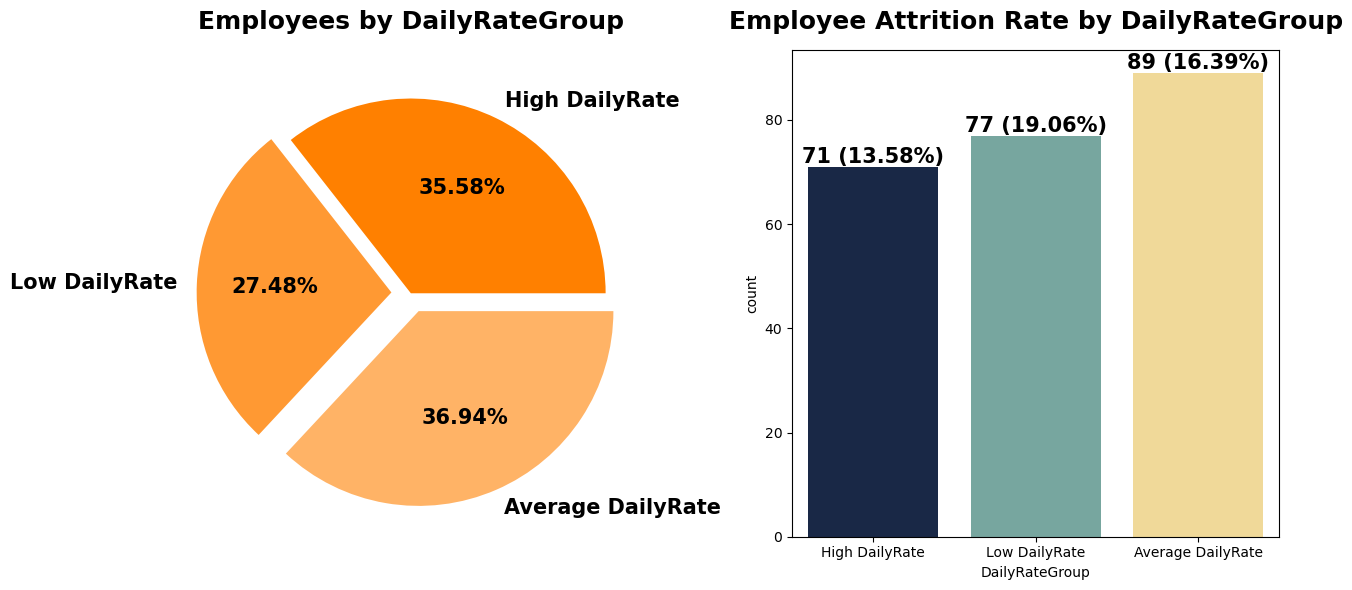

In [59]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `spark` is your SparkSession and `employee_data` is your PySpark DataFrame

# Calculate counts for DailyRateGroup
value_1 = employee_data.groupBy("DailyRateGroup").count().toPandas()

# Visualization to show Total Employees by DailyRateGroup
plt.figure(figsize=(13, 6))

# Pie chart for employees by DailyRateGroup
plt.subplot(1, 2, 1)
plt.pie(value_1["count"], labels=value_1["DailyRateGroup"], autopct="%.2f%%", textprops={"fontweight": "black", "size": 15},
        explode=[0, 0.1, 0.1], colors=['#FF8000', '#FF9933', '#FFB366'])
plt.title("Employees by DailyRateGroup", fontweight="black", pad=15, size=18)

# Calculate counts for attrition by DailyRateGroup
attrition_counts = employee_data.filter(employee_data["Attrition"] == "Yes").groupBy("DailyRateGroup").count().toPandas()

# Visualization to show Attrition Rate by DailyRateGroup
plt.subplot(1, 2, 2)
sns.barplot(x=attrition_counts["DailyRateGroup"], y=attrition_counts["count"], palette=["#11264e", "#6faea4", "#FEE08B"])
plt.title("Employee Attrition Rate by DailyRateGroup", fontweight="black", pad=15, size=18)
for index, value in enumerate(attrition_counts["count"]):
    attrition_rate = (value / value_1.loc[value_1["DailyRateGroup"] == attrition_counts["DailyRateGroup"].iloc[index], "count"].iloc[0]) * 100
    plt.text(index, value, f"{value} ({attrition_rate:.2f}%)", ha="center", va="bottom", fontweight="black", size=15)

plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY DISTANCE FROM HOME.

In [60]:
# Assuming `employee_data` is your PySpark DataFrame and you have a SparkSession set up

# Calculate the number of unique values in the "DistanceFromHome" column
unique_distance_values = employee_data.select("DistanceFromHome").distinct().count()

print("Total Unique Values in DistanceFromHome:", unique_distance_values)


Total Unique Values in DistanceFromHome: 29


In [61]:
from pyspark.sql.functions import col

# Describe the "DistanceFromHome" column
distance_stats = employee_data.describe("DistanceFromHome").toPandas().transpose()

# Print the transposed DataFrame to display as desired
print(distance_stats)


                      0                 1                 2    3    4
summary           count              mean            stddev  min  max
DistanceFromHome   1470  9.19251700680272  8.10686443566608    1   29


In [62]:
from pyspark.sql.functions import when
from pyspark.sql.types import StringType

# Define the bin edges and labels
bin_edges = [0, 2, 5, 10, 30]
bin_labels = ['0-2 kms', '3-5 kms', '6-10 kms', '10+ kms']

# Create a new column 'DistanceGroup' based on binning
employee_data = employee_data.withColumn(
    'DistanceGroup',
    when((employee_data['DistanceFromHome'] >= bin_edges[0]) & (employee_data['DistanceFromHome'] < bin_edges[1]), bin_labels[0])
    .when((employee_data['DistanceFromHome'] >= bin_edges[1]) & (employee_data['DistanceFromHome'] < bin_edges[2]), bin_labels[1])
    .when((employee_data['DistanceFromHome'] >= bin_edges[2]) & (employee_data['DistanceFromHome'] < bin_edges[3]), bin_labels[2])
    .when(employee_data['DistanceFromHome'] >= bin_edges[3], bin_labels[3])
    .otherwise(None)
)

# Convert the column to StringType for better display (if needed)
employee_data = employee_data.withColumn("DistanceGroup", employee_data["DistanceGroup"].cast(StringType()))

# Display the first few rows to verify
employee_data.select("DistanceFromHome", "DistanceGroup").show(5)


+----------------+-------------+
|DistanceFromHome|DistanceGroup|
+----------------+-------------+
|               1|      0-2 kms|
|               8|     6-10 kms|
|               2|      3-5 kms|
|               3|      3-5 kms|
|               2|      3-5 kms|
+----------------+-------------+
only showing top 5 rows



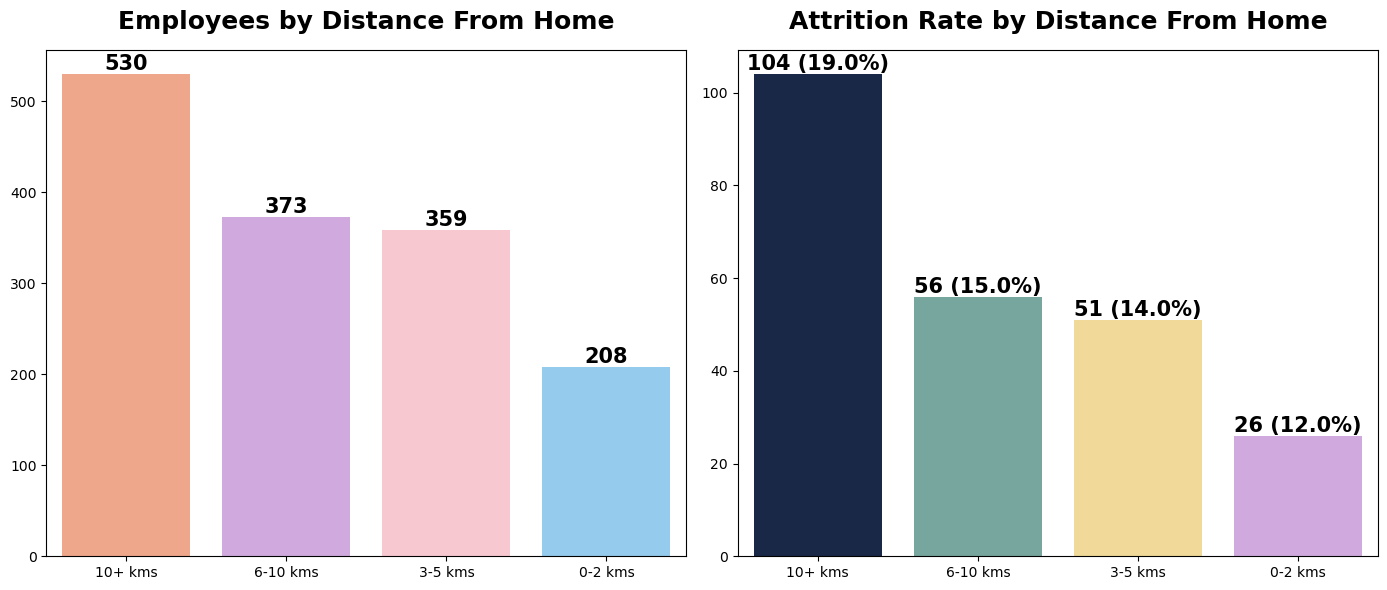

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you've converted relevant data to Pandas for visualization
employee_data_pd = employee_data.toPandas()

# Visualization to show Total Employees by DistanceFromHomeGroup.
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
value_1 = employee_data_pd["DistanceGroup"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, palette=["#FFA07A", "#D4A1E7", "#FFC0CB", "#87CEFA"])
plt.title("Employees by Distance From Home", fontweight="black", pad=15, size=18)
for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=15)

# Visualization to show Attrition Rate by DistanceFromHome.
plt.subplot(1, 2, 2)
new_df_pd = employee_data_pd[employee_data_pd["Attrition"] == "Yes"]
value_2 = new_df_pd["DistanceGroup"].value_counts()
attrition_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index, y=value_2.values, palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Attrition Rate by Distance From Home", fontweight="black", pad=15, size=18)
for index, value in enumerate(value_2.values):
    plt.text(index, value, f"{value} ({attrition_rate[index]}%)", ha="center", va="bottom", fontweight="black", size=15)

plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY EDUCATION.

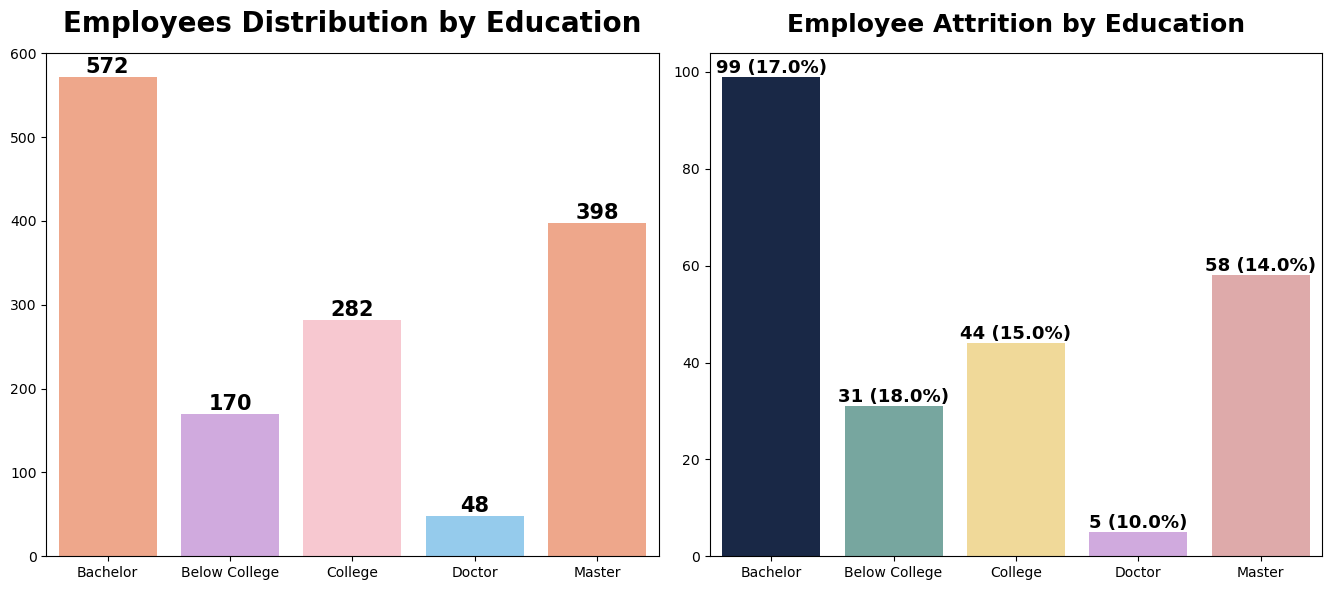

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert relevant data to Pandas for visualization
employee_data_pd = employee_data.toPandas()

# Filter data for employees with Attrition
new_df = employee_data.filter(employee_data["Attrition"] == "Yes")
new_df_pd = new_df.toPandas()

# Visualization to show Total Employees by Education.
plt.figure(figsize=(13.5, 6))
plt.subplot(1, 2, 1)
value_1 = employee_data_pd["Education"].value_counts().sort_index()
sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette=["#FFA07A", "#D4A1E7", "#FFC0CB", "#87CEFA"])
plt.title("Employees Distribution by Education", fontweight="black", size=20, pad=15)
for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=15)

# Visualization to show Employee Attrition by Education.
plt.subplot(1, 2, 2)
value_2 = new_df_pd["Education"].value_counts().sort_index()
attrition_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index, y=value_2.values, order=value_2.index, palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Employee Attrition by Education", fontweight="black", size=18, pad=15)
for index, value in enumerate(value_2.values):
    plt.text(index, value, f"{value} ({attrition_rate[index]}%)", ha="center", va="bottom", fontweight="black", size=13)

plt.tight_layout()
plt.show()



## ANALYZING EMPLOYEE ATTRITION BY EDUCATION FIELD.

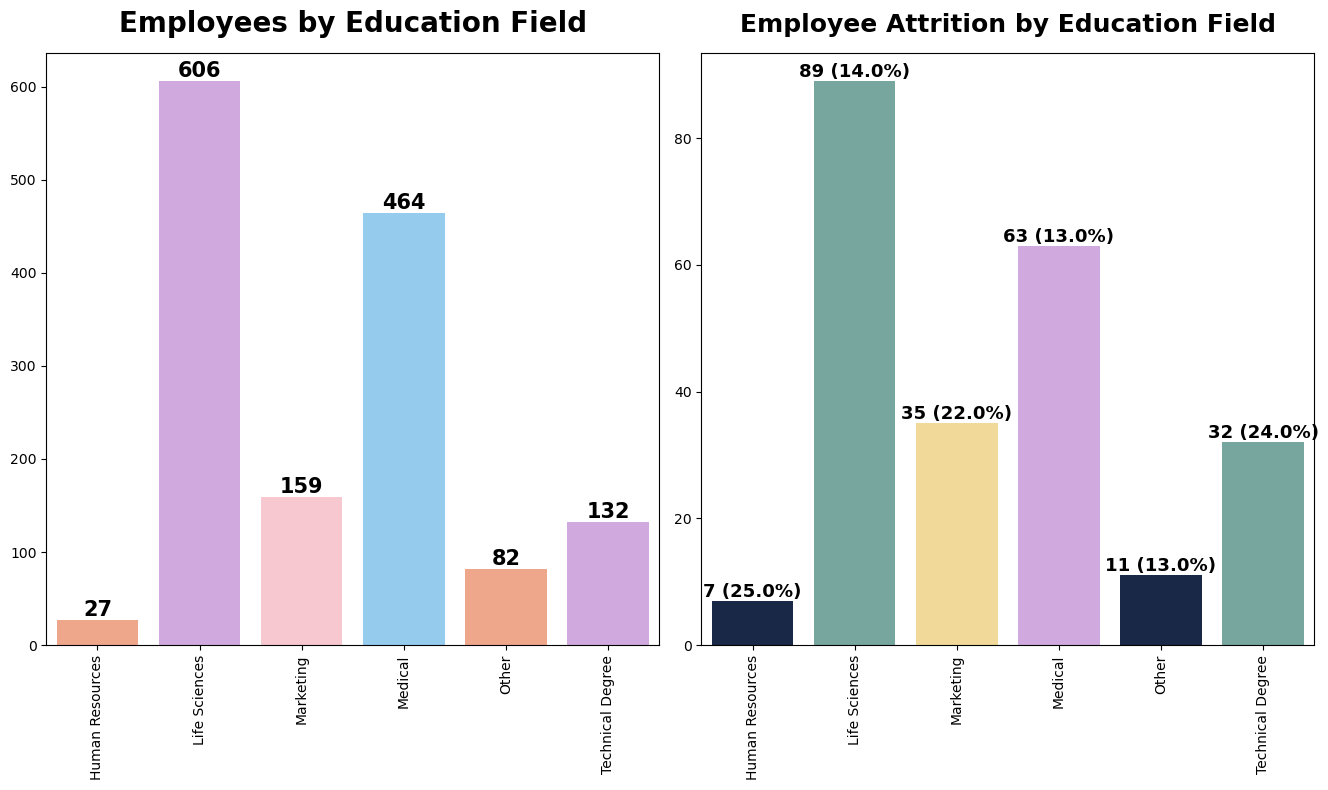

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert relevant data to Pandas for visualization
employee_data_pd = employee_data.toPandas()

# Filter data for employees with Attrition
new_df = employee_data.filter(employee_data["Attrition"] == "Yes")
new_df_pd = new_df.toPandas()

# Visualization to show Total Employees by Education Field.
plt.figure(figsize=(13.5, 8))
plt.subplot(1, 2, 1)
value_1 = employee_data_pd["EducationField"].value_counts().sort_index()
sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette=["#FFA07A", "#D4A1E7", "#FFC0CB", "#87CEFA"])
plt.title("Employees by Education Field", fontweight="black", size=20, pad=15)
for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=15)
plt.xticks(rotation=90)

# Visualization to show Employee Attrition by Education Field.
plt.subplot(1, 2, 2)
value_2 = new_df_pd["EducationField"].value_counts().sort_index()
attrition_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index, y=value_2.values, order=value_2.index, palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7"])
plt.title("Employee Attrition by Education Field", fontweight="black", size=18, pad=15)
for index, value in enumerate(value_2.values):
    plt.text(index, value, f"{value} ({attrition_rate[index]}%)", ha="center", va="bottom", fontweight="black", size=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY ENVIRONMENT SATISFACTION.

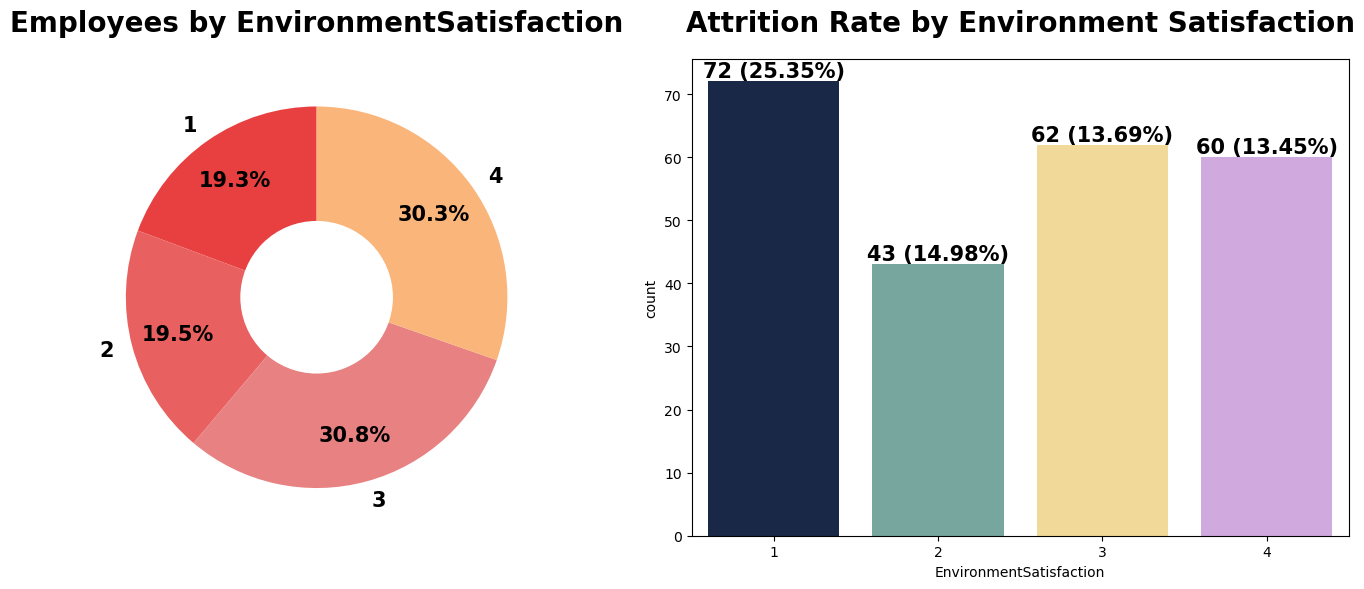

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql import functions as F

# Assuming `employee_data` is a Spark DataFrame

# Calculate counts for EnvironmentSatisfaction
value_1 = employee_data.groupBy("EnvironmentSatisfaction").count().orderBy("EnvironmentSatisfaction")

# Convert to Pandas DataFrame for visualization
value_1_pd = value_1.toPandas()

# Visualization to show Total Employees by EnvironmentSatisfaction.
plt.figure(figsize=(14, 6))

# Pie chart for employees by EnvironmentSatisfaction
plt.subplot(1, 2, 1)
plt.pie(value_1_pd["count"], labels=value_1_pd["EnvironmentSatisfaction"], autopct="%.1f%%", pctdistance=0.75, startangle=90,
        colors=['#E84040', '#E96060', '#E88181', '#FAB57A'], textprops={"fontweight": "black", "size": 15})
plt.title("Employees by EnvironmentSatisfaction", fontweight="black", size=20, pad=20)
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Visualization to show Attrition Rate by EnvironmentSatisfaction.
plt.subplot(1, 2, 2)
attrition_counts = employee_data.filter(employee_data["Attrition"] == "Yes").groupBy("EnvironmentSatisfaction").count().orderBy("EnvironmentSatisfaction")
attrition_counts_pd = attrition_counts.toPandas()
attrition_rate = (attrition_counts_pd["count"] / value_1_pd["count"]) * 100
sns.barplot(x=attrition_counts_pd["EnvironmentSatisfaction"], y=attrition_counts_pd["count"],
            palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Attrition Rate by Environment Satisfaction", fontweight="black", size=20, pad=20)
for index, value in enumerate(attrition_counts_pd["count"]):
    plt.text(index, value, f"{value} ({attrition_rate[index]:.2f}%)", ha="center", va="bottom", size=15, fontweight="black")
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY JOB ROLES.

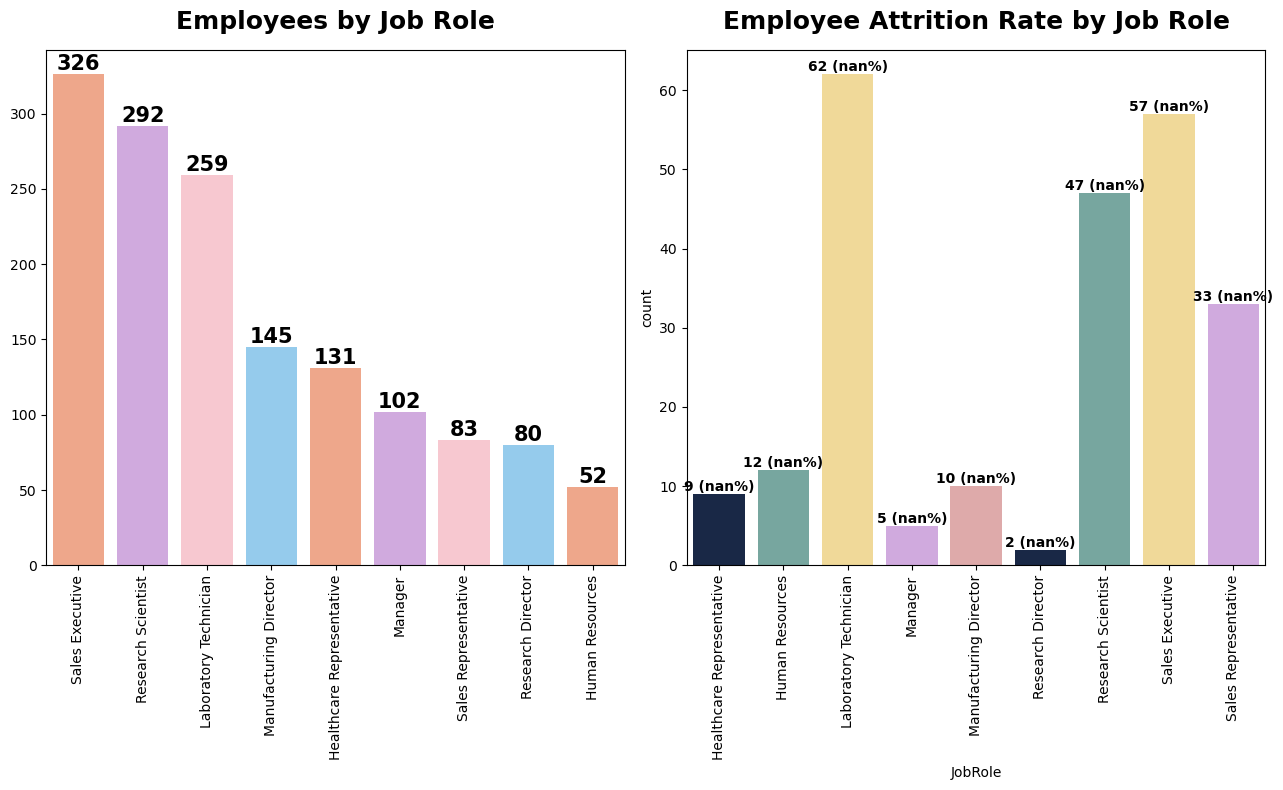

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql import functions as F

# Assuming `employee_data` is a PySpark DataFrame

# Convert PySpark DataFrame to Pandas for visualization
employee_data_pd = employee_data.toPandas()

# Visualization to show Total Employees by JobRole.
plt.figure(figsize=(13, 8))

# Bar plot for employees by JobRole
plt.subplot(1, 2, 1)
value_1 = employee_data_pd["JobRole"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values, palette=["#FFA07A", "#D4A1E7", "#FFC0CB", "#87CEFA"])
plt.title("Employees by Job Role", fontweight="black", pad=15, size=18)
plt.xticks(rotation=90)
for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=15)

# Bar plot for attrition rate by JobRole
plt.subplot(1, 2, 2)
attrition_counts = employee_data.filter(employee_data["Attrition"] == "Yes").groupBy("JobRole").count().orderBy("JobRole")
attrition_counts_pd = attrition_counts.toPandas()
attrition_rate = (attrition_counts_pd["count"] / value_1) * 100
sns.barplot(x=attrition_counts_pd["JobRole"], y=attrition_counts_pd["count"], palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Employee Attrition Rate by Job Role", fontweight="black", pad=15, size=18)
plt.xticks(rotation=90)
for index, value in enumerate(attrition_counts_pd["count"]):
    plt.text(index, value, f"{value} ({attrition_rate[index]:.2f}%)", ha="center", va="bottom", size=10, fontweight="black")
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY JOB LEVEL.

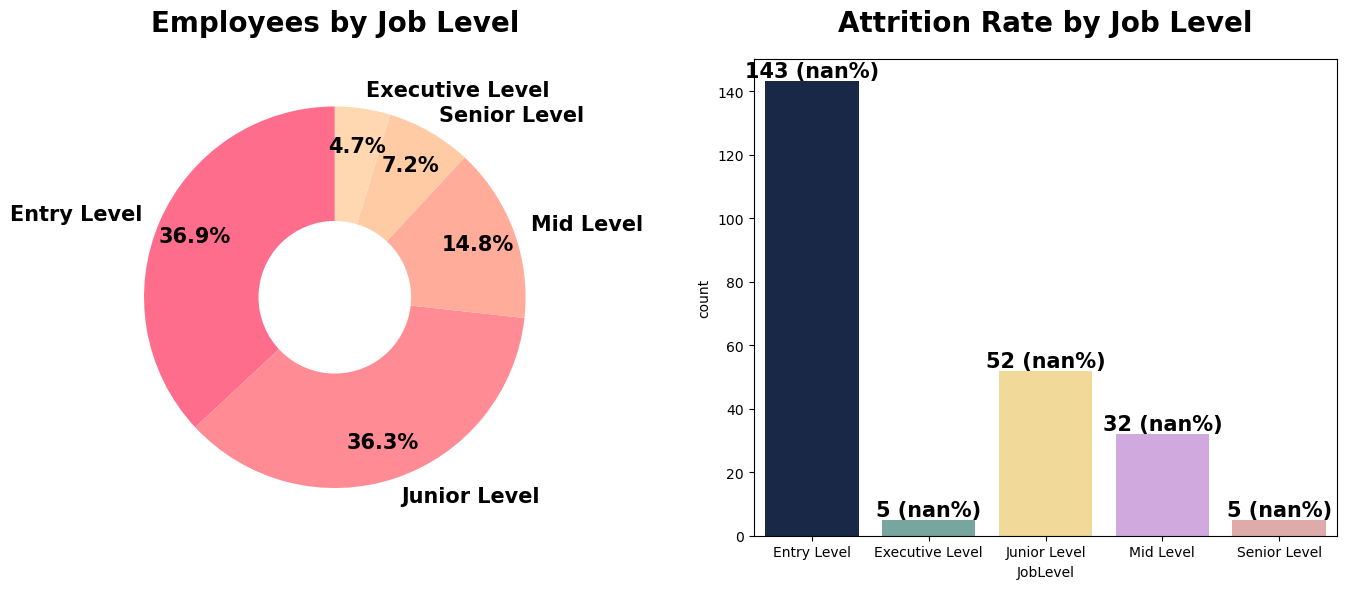

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql import functions as F

# Assuming `employee_data` is a PySpark DataFrame

# Convert PySpark DataFrame to Pandas for visualization
employee_data_pd = employee_data.toPandas()

# Visualization to show Total Employees by JobLevel.
plt.figure(figsize=(14, 6))

# Pie chart for employees by JobLevel
plt.subplot(1, 2, 1)
value_1 = employee_data_pd["JobLevel"].value_counts()
plt.title("Employees by Job Level", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%", pctdistance=0.8, startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4', "#FFD8B1"], textprops={"fontweight": "black", "size": 15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Visualization to show Attrition Rate by JobLevel.
plt.subplot(1, 2, 2)
attrition_counts = employee_data.filter(employee_data["Attrition"] == "Yes").groupBy("JobLevel").count().orderBy("JobLevel")
attrition_counts_pd = attrition_counts.toPandas()
attrition_rate = (attrition_counts_pd["count"] / value_1) * 100
sns.barplot(x=attrition_counts_pd["JobLevel"], y=attrition_counts_pd["count"], order=attrition_counts_pd["JobLevel"],
            palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Attrition Rate by Job Level", fontweight="black", size=20, pad=20)
for index, value in enumerate(attrition_counts_pd["count"]):
    plt.text(index, value, f"{value} ({attrition_rate[index]:.2f}%)", ha="center", va="bottom", size=15, fontweight="black")
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY JOB SATISFACTION.

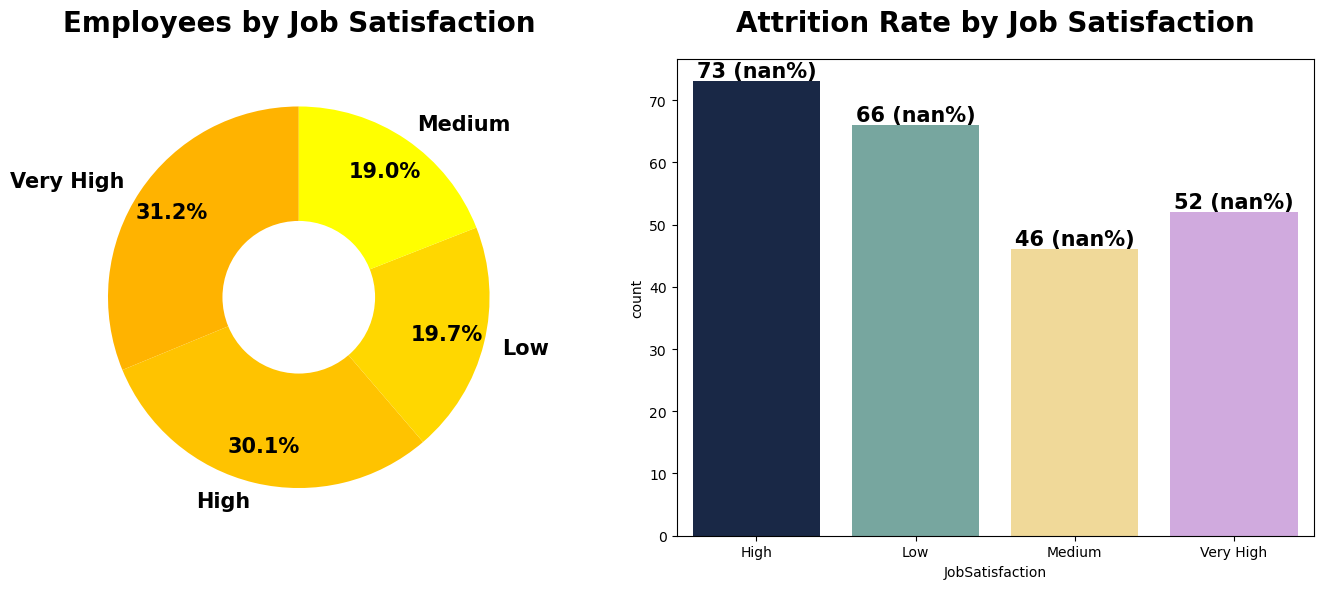

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql import functions as F

# Assuming `employee_data` is a PySpark DataFrame

# Convert PySpark DataFrame to Pandas for visualization
employee_data_pd = employee_data.toPandas()

# Visualization to show Total Employees by JobSatisfaction.
plt.figure(figsize=(14, 6))

# Pie chart for employees by JobSatisfaction
plt.subplot(1, 2, 1)
value_1 = employee_data_pd["JobSatisfaction"].value_counts()
plt.title("Employees by Job Satisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%", pctdistance=0.8, startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'], textprops={"fontweight": "black", "size": 15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Visualization to show Attrition Rate by JobSatisfaction.
plt.subplot(1, 2, 2)
attrition_counts = employee_data.filter(employee_data["Attrition"] == "Yes").groupBy("JobSatisfaction").count().orderBy("JobSatisfaction")
attrition_counts_pd = attrition_counts.toPandas()
attrition_rate = (attrition_counts_pd["count"] / value_1) * 100
sns.barplot(x=attrition_counts_pd["JobSatisfaction"], y=attrition_counts_pd["count"], order=attrition_counts_pd["JobSatisfaction"],
            palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Attrition Rate by Job Satisfaction", fontweight="black", size=20, pad=20)
for index, value in enumerate(attrition_counts_pd["count"]):
    plt.text(index, value, f"{value} ({attrition_rate[index]:.2f}%)", ha="center", va="bottom", size=15, fontweight="black")
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY MARTIAL STATUS.

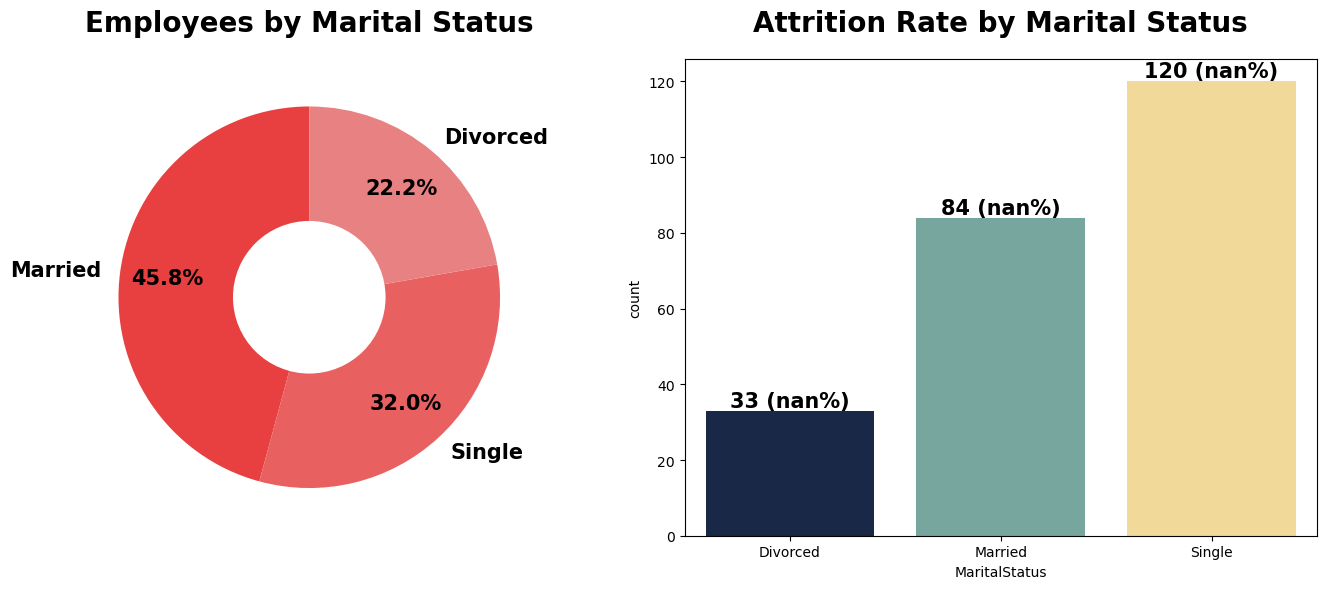

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql import functions as F

# Assuming `employee_data` is a PySpark DataFrame

# Convert PySpark DataFrame to Pandas for visualization
employee_data_pd = employee_data.toPandas()

# Visualization to show Total Employees by MaritalStatus.
plt.figure(figsize=(14, 6))

# Pie chart for employees by MaritalStatus
plt.subplot(1, 2, 1)
value_1 = employee_data_pd["MaritalStatus"].value_counts()
plt.title("Employees by Marital Status", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
        colors=['#E84040', '#E96060', '#E88181'], textprops={"fontweight": "black", "size": 15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Visualization to show Attrition Rate by MaritalStatus.
plt.subplot(1, 2, 2)
attrition_counts = employee_data.filter(employee_data["Attrition"] == "Yes").groupBy("MaritalStatus").count().orderBy("MaritalStatus")
attrition_counts_pd = attrition_counts.toPandas()
attrition_rate = (attrition_counts_pd["count"] / value_1) * 100
sns.barplot(x=attrition_counts_pd["MaritalStatus"], y=attrition_counts_pd["count"], order=attrition_counts_pd["MaritalStatus"],
            palette=["#11264e", "#6faea4", "#FEE08B"])
plt.title("Attrition Rate by Marital Status", fontweight="black", size=20, pad=20)
for index, value in enumerate(attrition_counts_pd["count"]):
    plt.text(index, value, f"{value} ({attrition_rate[index]:.2f}%)", ha="center", va="bottom", size=15, fontweight="black")
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY MONTHLY INCOME.

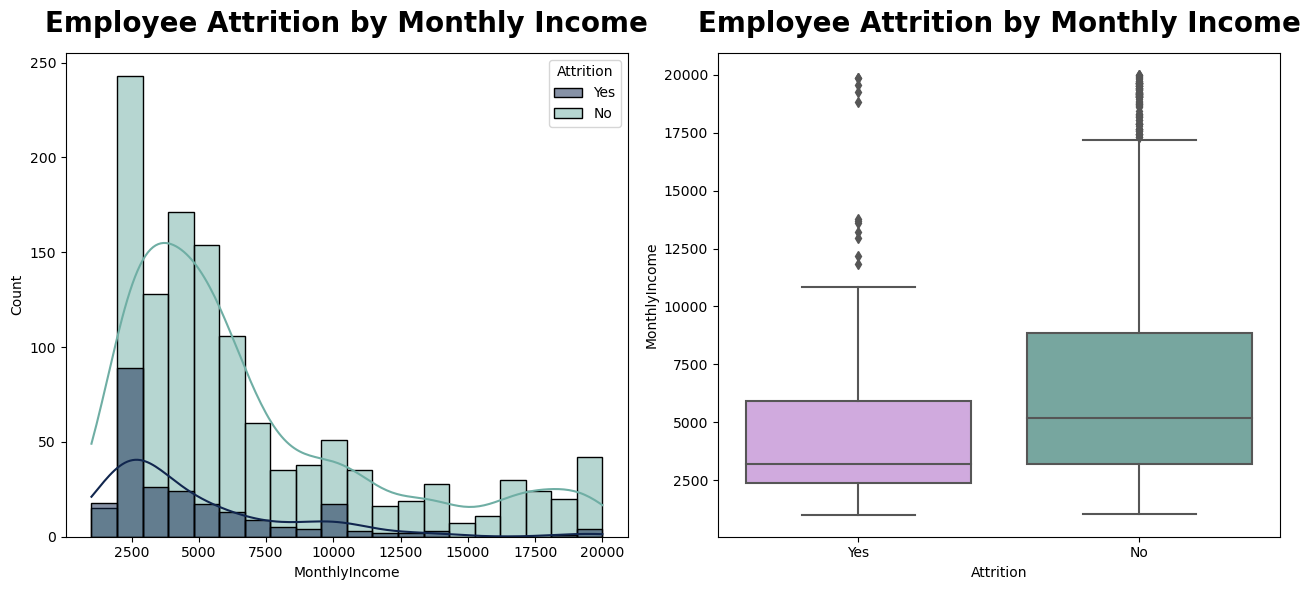

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

# Assuming `employee_data` is a PySpark DataFrame

# Visualization to show Employee Distribution by MonthlyIncome
plt.figure(figsize=(13, 6))

# Histogram with KDE to show Employee Attrition by Monthly Income
plt.subplot(1, 2, 1)
sns.histplot(x="MonthlyIncome", hue="Attrition", kde=True, data=employee_data.toPandas(), palette=["#11264e", "#6faea4"])
plt.title("Employee Attrition by Monthly Income", fontweight="black", size=20, pad=15)

# Boxplot to show Employee Attrition by Monthly Income
plt.subplot(1, 2, 2)
sns.boxplot(x="Attrition", y="MonthlyIncome", data=employee_data.toPandas(), palette=["#D4A1E7", "#6faea4"])
plt.title("Employee Attrition by Monthly Income", fontweight="black", size=20, pad=15)

plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY WORK EXPERIENCE.

In [76]:
# Assuming `employee_data` is a PySpark DataFrame

# Import necessary functions
from pyspark.sql import functions as F

# Calculate descriptive statistics
num_companies_worked_stats = employee_data.select(F.describe("NumCompaniesWorked")).toPandas().T

# Display the statistics
print(num_companies_worked_stats)


AttributeError: module 'pyspark.sql.functions' has no attribute 'describe'

In [77]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# Assuming `spark` is your SparkSession and `employee_data` is your PySpark DataFrame

# Calculate descriptive statistics
num_companies_worked_stats = employee_data.select(
    F.count(F.col("NumCompaniesWorked")).alias("Count"),
    F.mean(F.col("NumCompaniesWorked")).alias("Mean"),
    F.stddev(F.col("NumCompaniesWorked")).alias("Stddev"),
    F.min(F.col("NumCompaniesWorked")).alias("Min"),
    F.expr("percentile_approx(NumCompaniesWorked, 0.25)").alias("25%"),
    F.expr("percentile_approx(NumCompaniesWorked, 0.50)").alias("50%"),
    F.expr("percentile_approx(NumCompaniesWorked, 0.75)").alias("75%"),
    F.max(F.col("NumCompaniesWorked")).alias("Max")
).toPandas().T

# Display the statistics
print(num_companies_worked_stats)


                  0
Count   1470.000000
Mean       2.693197
Stddev     2.498009
Min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
Max        9.000000


In [79]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.ml.feature import Bucketizer

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Binning Example") \
    .getOrCreate()

# Example DataFrame, replace with your actual DataFrame
# Assuming `employee_data` is a PySpark DataFrame
# Replace this with your actual DataFrame or read from a file

# Define bin edges and labels
bin_edges = [0, 1, 3, 5, 10]
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', '5+ companies']

# Create a Bucketizer instance
bucketizer = Bucketizer(splits=bin_edges, inputCol="NumCompaniesWorked", outputCol="NumCompaniesWorkedBucket")

# Apply the Bucketizer to transform the data
bucketed_data = bucketizer.transform(employee_data)

# Map bucket indices to bin labels
bucketed_data = bucketed_data.withColumn("NumCompaniesWorkedGroup",
                                         when(col("NumCompaniesWorkedBucket") == 0, bin_labels[0])
                                         .when(col("NumCompaniesWorkedBucket") == 1, bin_labels[1])
                                         .when(col("NumCompaniesWorkedBucket") == 2, bin_labels[2])
                                         .otherwise(bin_labels[3]))

# Show the transformed DataFrame
bucketed_data.select("NumCompaniesWorked", "NumCompaniesWorkedGroup").show()

# Optionally, convert to Pandas DataFrame for further analysis or visualization
pandas_df = bucketed_data.toPandas()


+------------------+-----------------------+
|NumCompaniesWorked|NumCompaniesWorkedGroup|
+------------------+-----------------------+
|                 8|           5+ companies|
|                 1|          2-3 companies|
|                 6|           5+ companies|
|                 1|          2-3 companies|
|                 9|           5+ companies|
|                 0|          0-1 Companies|
|                 4|          4-5 companies|
|                 1|          2-3 companies|
|                 0|          0-1 Companies|
|                 6|           5+ companies|
|                 0|          0-1 Companies|
|                 0|          0-1 Companies|
|                 1|          2-3 companies|
|                 0|          0-1 Companies|
|                 5|           5+ companies|
|                 1|          2-3 companies|
|                 0|          0-1 Companies|
|                 1|          2-3 companies|
|                 2|          2-3 companies|
|         

In [83]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Assuming SparkSession is already created or created as follows:
spark = SparkSession.builder \
    .appName("Employee Attrition Analysis") \
    .getOrCreate()

# Example data (replace with your actual data loading method)
employee_data = spark.read.csv("C:/Users/basan/Downloads/WA_Fn-UseC_-HR-Employee-Attrition (2).csv", header=True, inferSchema=True)

# Example code to calculate group sizes
group_sizes = employee_data.groupby("NumCompaniesWorkedGroup").agg(F.count("*").alias("count"))

# Convert to Pandas DataFrame for visualization
group_sizes_pd = group_sizes.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(group_sizes_pd["NumCompaniesWorkedGroup"], group_sizes_pd["count"], color='#FF6D8C')
plt.title("Employees by Companies Worked", fontweight="bold", size=15)
plt.xlabel("NumCompaniesWorkedGroup")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `NumCompaniesWorkedGroup` cannot be resolved. Did you mean one of the following? [`NumCompaniesWorked`, `EmployeeNumber`, `JobSatisfaction`, `BusinessTravel`, `DistanceFromHome`].;
'Aggregate ['NumCompaniesWorkedGroup], ['NumCompaniesWorkedGroup, count(1) AS count#10475L]
+- Relation [Age#10369,Attrition#10370,BusinessTravel#10371,DailyRate#10372,Department#10373,DistanceFromHome#10374,Education#10375,EducationField#10376,EmployeeCount#10377,EmployeeNumber#10378,EnvironmentSatisfaction#10379,Gender#10380,HourlyRate#10381,JobInvolvement#10382,JobLevel#10383,JobRole#10384,JobSatisfaction#10385,MaritalStatus#10386,MonthlyIncome#10387,MonthlyRate#10388,NumCompaniesWorked#10389,Over18#10390,OverTime#10391,PercentSalaryHike#10392,... 11 more fields] csv


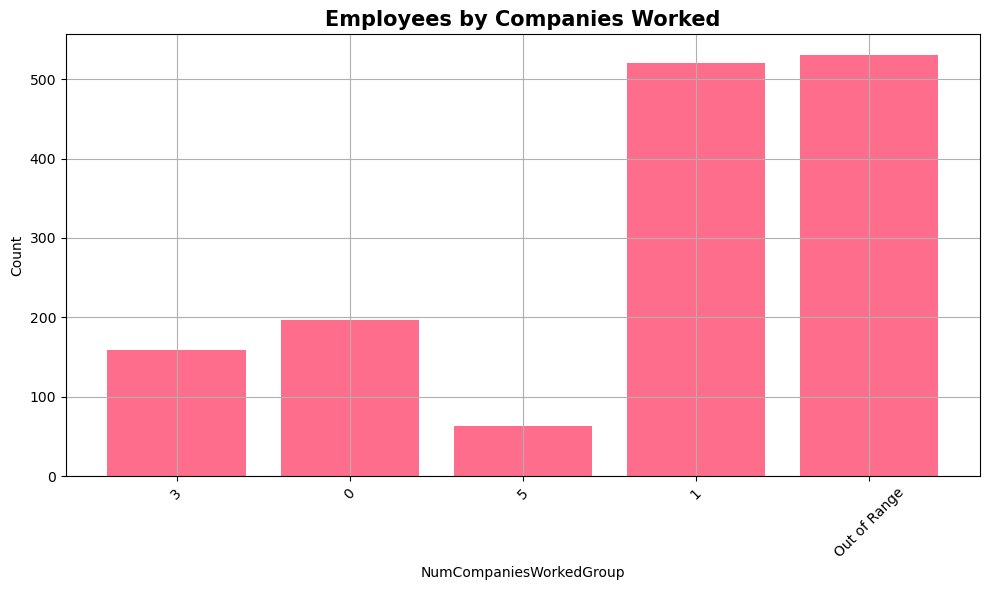

In [84]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Assuming SparkSession is already created or created as follows:
spark = SparkSession.builder \
    .appName("Employee Attrition Analysis") \
    .getOrCreate()

# Example data loading (replace with your actual data loading method)
employee_data = spark.read.csv("C:/Users/basan/Downloads/WA_Fn-UseC_-HR-Employee-Attrition (2).csv", header=True, inferSchema=True)

# Define the bin edges for the groups
bin_edges = [0, 1, 3, 5, 10]
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "5+ companies"]

# Cut the NumCompaniesWorked column into groups
employee_data = employee_data.withColumn("NumCompaniesWorkedGroup", F.when(F.col("NumCompaniesWorked").isNull(), "Unknown").otherwise(
    F.when(F.col("NumCompaniesWorked").isin(bin_edges), F.col("NumCompaniesWorked")).otherwise("Out of Range")))

# Example code to calculate group sizes
group_sizes = employee_data.groupby("NumCompaniesWorkedGroup").agg(F.count("*").alias("count"))

# Convert to Pandas DataFrame for visualization
group_sizes_pd = group_sizes.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(group_sizes_pd["NumCompaniesWorkedGroup"], group_sizes_pd["count"], color='#FF6D8C')
plt.title("Employees by Companies Worked", fontweight="bold", size=15)
plt.xlabel("NumCompaniesWorkedGroup")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##  ANALYZING EMPLOYEE ATTRITION BY OVERTIME.

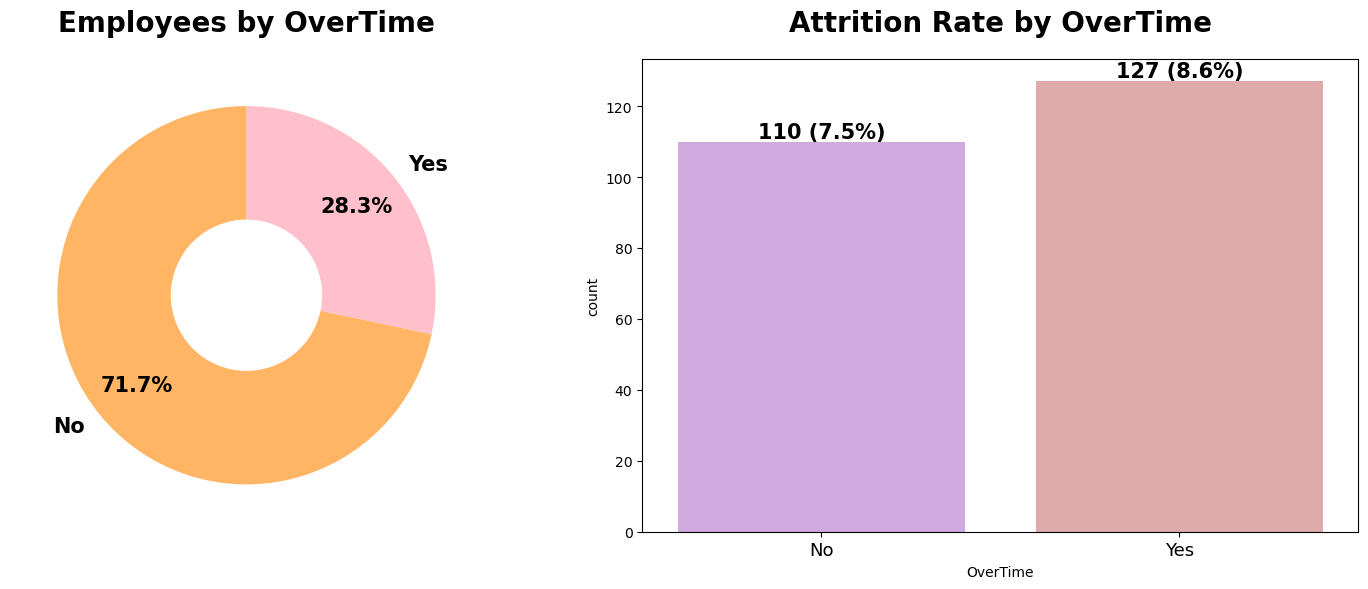

In [85]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Assuming SparkSession is already created or created as follows:
spark = SparkSession.builder \
    .appName("Employee Attrition Analysis") \
    .getOrCreate()

# Example data loading (replace with your actual data loading method)
employee_data = spark.read.csv("C:/Users/basan/Downloads/WA_Fn-UseC_-HR-Employee-Attrition (2).csv", header=True, inferSchema=True)

# Visualization to show Total Employees by OverTime
plt.figure(figsize=(15, 6))

# Calculate total employees by OverTime
plt.subplot(1, 2, 1)
value_1 = employee_data.groupby("OverTime").agg(F.count("*").alias("count")).toPandas()
plt.title("Employees by OverTime", fontweight="bold", size=20, pad=20)
plt.pie(value_1["count"], labels=value_1["OverTime"], autopct="%.1f%%", pctdistance=0.75, startangle=90,
        colors=["#ffb563", "#FFC0CB"], textprops={"fontweight": "bold", "size": 15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Visualization to show Attrition Rate by OverTime
plt.subplot(1, 2, 2)
attrition_data = employee_data.filter(employee_data["Attrition"] == "Yes")
value_2 = attrition_data.groupby("OverTime").agg(F.count("*").alias("count")).toPandas()
attrition_rate = (value_2["count"] / value_1["count"].sum()) * 100
sns.barplot(x=value_2["OverTime"], y=value_2["count"], palette=["#D4A1E7", "#E7A1A1"])
plt.title("Attrition Rate by OverTime", fontweight="bold", size=20, pad=20)
for index, value in enumerate(value_2["count"]):
    plt.text(index, value, f"{value} ({attrition_rate[index]:.1f}%)", ha="center", va="bottom",
             size=15, fontweight="bold")
plt.xticks(size=13)
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY SALARY HIKE.

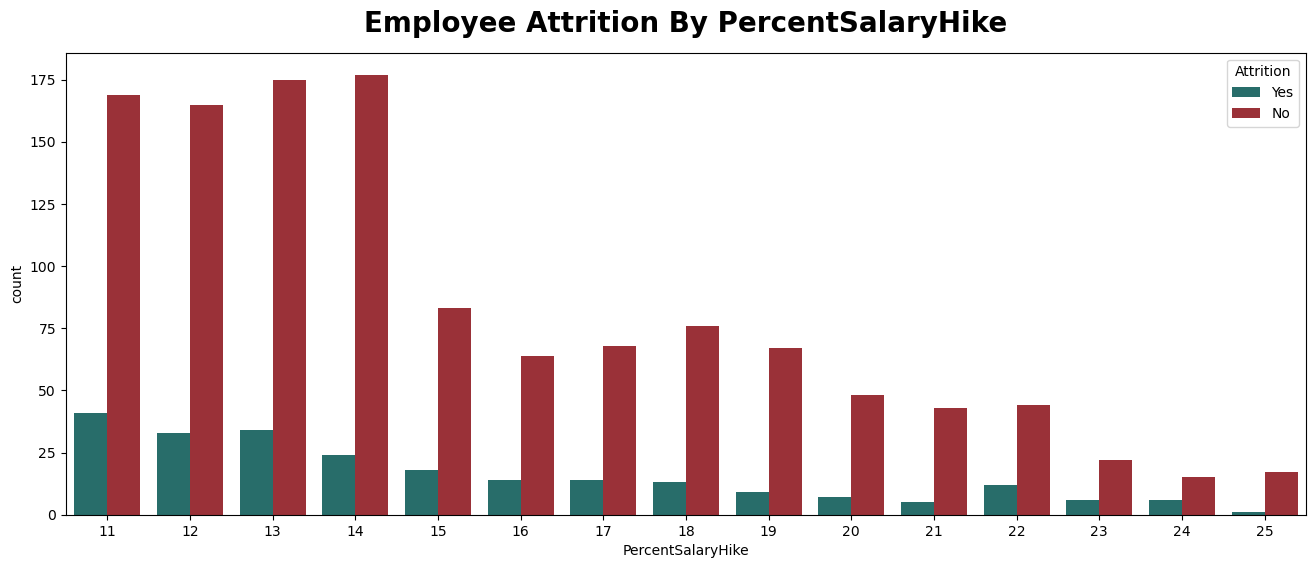

In [87]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Assuming SparkSession is already created or created as follows:
spark = SparkSession.builder \
    .appName("Employee Attrition Analysis") \
    .getOrCreate()

# Example data loading (replace with your actual data loading method)
employee_data = spark.read.csv("C:/Users/basan/Downloads/WA_Fn-UseC_-HR-Employee-Attrition (2).csv", header=True, inferSchema=True)

# Visualization to show Employee Distribution by PercentSalaryHike
plt.figure(figsize=(16, 6))
employee_data_pd = employee_data.toPandas()  # Convert Spark DataFrame to Pandas for visualization

# Use seaborn countplot to visualize distribution by PercentSalaryHike and Attrition
sns.countplot(x="PercentSalaryHike", hue="Attrition", data=employee_data_pd, palette=["#1d7874", "#AC1F29"])
plt.title("Employee Attrition By PercentSalaryHike", fontweight="bold", size=20, pad=15)
plt.show()



## ANALYZING EMPLOYEE ATTRITION BY PERFORMANCE RATING.

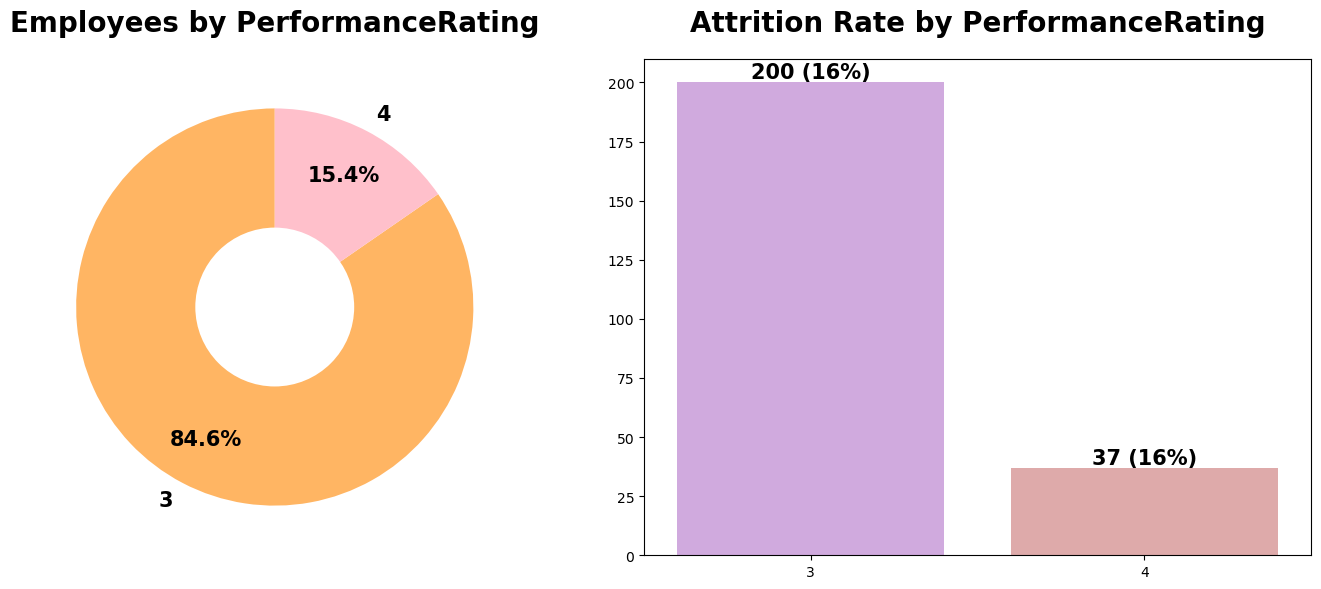

In [89]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Assuming SparkSession is already created or created as follows:
spark = SparkSession.builder \
    .appName("Employee Attrition Analysis") \
    .getOrCreate()

# Example data loading (replace with your actual data loading method)
employee_data = spark.read.csv("C:/Users/basan/Downloads/WA_Fn-UseC_-HR-Employee-Attrition (2).csv", header=True, inferSchema=True)

# Visualization to show Employee Distribution by PerformanceRating
plt.figure(figsize=(14, 6))
employee_data_pd = employee_data.toPandas()  # Convert Spark DataFrame to Pandas for visualization

# Pie chart for Total Employees by PerformanceRating
plt.subplot(1, 2, 1)
value_1 = employee_data_pd["PerformanceRating"].value_counts()
plt.title("Employees by PerformanceRating", fontweight="bold", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
        colors=["#ffb563", "#FFC0CB"], textprops={"fontweight": "bold", "size": 15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Bar plot for Attrition Rate by PerformanceRating
plt.subplot(1, 2, 2)
new_df = employee_data_pd[employee_data_pd["Attrition"] == "Yes"]
value_2 = new_df["PerformanceRating"].value_counts()
attrition_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values, palette=["#D4A1E7", "#E7A1A1"])
plt.title("Attrition Rate by PerformanceRating", fontweight="bold", size=20, pad=20)
for index, value in enumerate(value_2):
    plt.text(index, value, f"{value} ({int(attrition_rate[index])}%)", ha="center", va="bottom",
             size=15, fontweight="bold")
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY RELATIONSHIP SATISFACTION

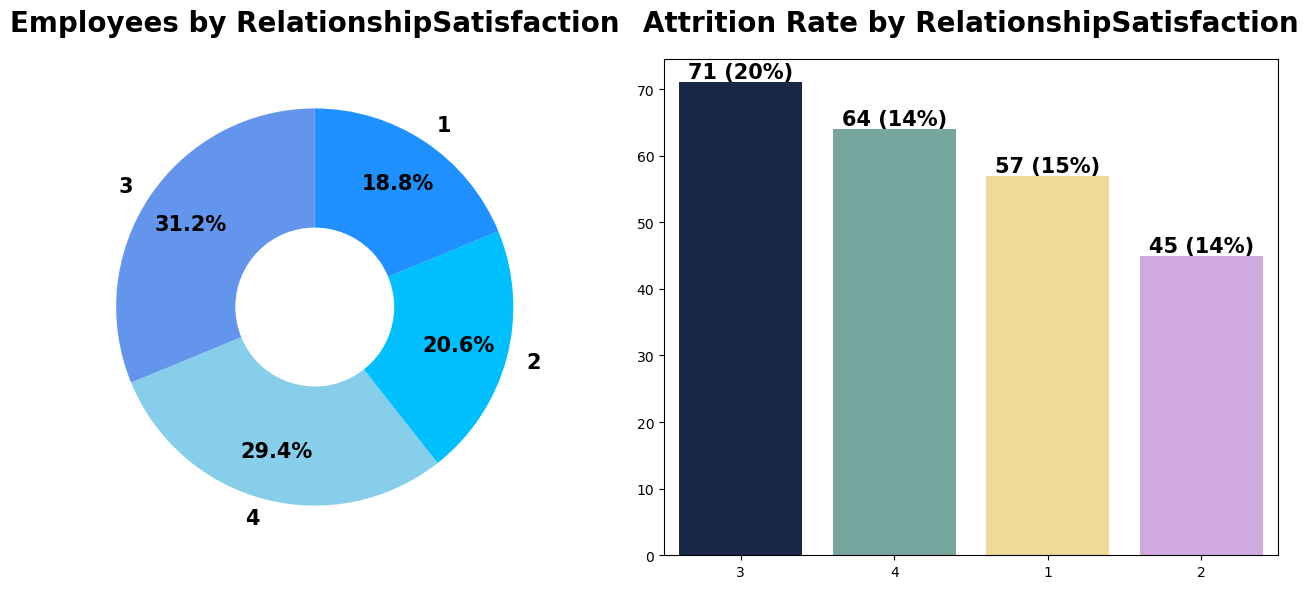

In [91]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Assuming SparkSession is already created or created as follows:
spark = SparkSession.builder \
    .appName("Employee Attrition Analysis") \
    .getOrCreate()

# Example data loading (replace with your actual data loading method)
employee_data = spark.read.csv("C:/Users/basan/Downloads/WA_Fn-UseC_-HR-Employee-Attrition (2).csv", header=True, inferSchema=True)

# Visualization to show Total Employees by RelationshipSatisfaction
plt.figure(figsize=(13, 6))
employee_data_pd = employee_data.toPandas()  # Convert Spark DataFrame to Pandas for visualization

# Pie chart for Total Employees by RelationshipSatisfaction
plt.subplot(1, 2, 1)
value_1 = employee_data_pd["RelationshipSatisfaction"].value_counts()
plt.title("Employees by RelationshipSatisfaction", fontweight="bold", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
        colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'], textprops={"fontweight": "bold", "size": 15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Bar plot for Attrition Rate by RelationshipSatisfaction
plt.subplot(1, 2, 2)
new_df = employee_data_pd[employee_data_pd["Attrition"] == "Yes"]
value_2 = new_df["RelationshipSatisfaction"].value_counts()
attrition_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values, order=value_2.index.tolist(),
            palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Attrition Rate by RelationshipSatisfaction", fontweight="bold", size=20, pad=20)
for index, value in enumerate(value_2):
    plt.text(index, value, f"{value} ({int(attrition_rate[index])}%)", ha="center", va="bottom",
             size=15, fontweight="bold")
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY WORK LIFE BALANCE.

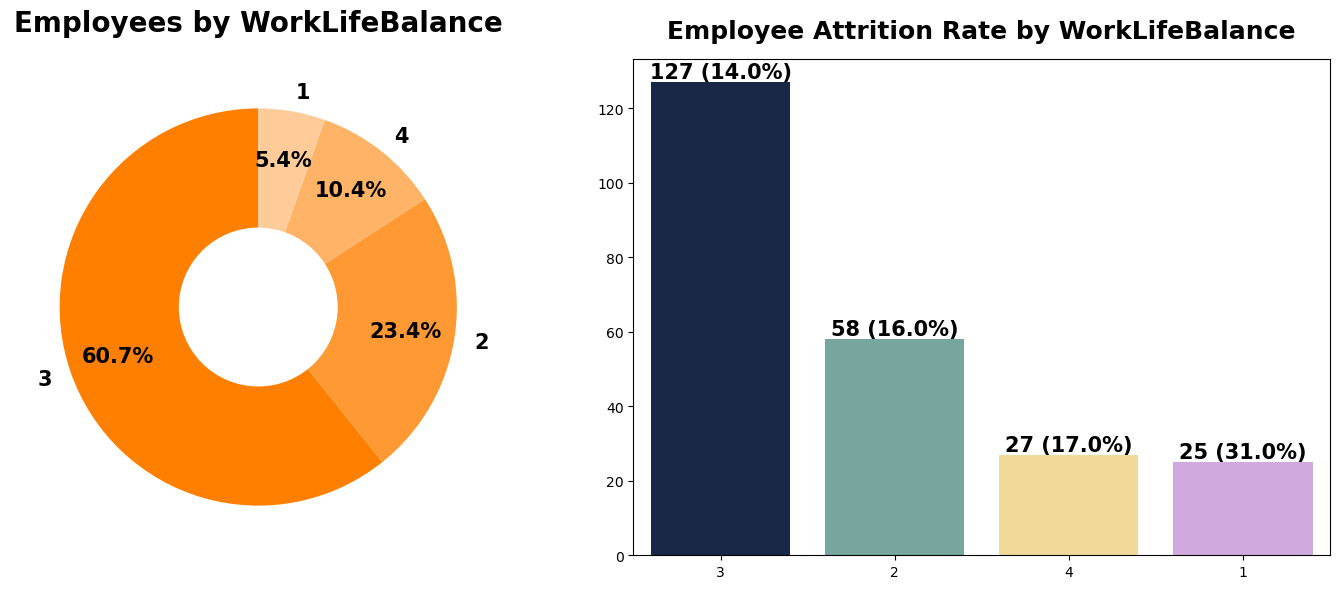

In [93]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Assuming SparkSession is already created or created as follows:
spark = SparkSession.builder \
    .appName("Employee Attrition Analysis") \
    .getOrCreate()

# Example data loading (replace with your actual data loading method)
employee_data = spark.read.csv("C:/Users/basan/Downloads/WA_Fn-UseC_-HR-Employee-Attrition (2).csv", header=True, inferSchema=True)

# Visualization to show Total Employees by WorkLifeBalance
plt.figure(figsize=(14.5, 6))

# Convert Spark DataFrame to Pandas for easier plotting
employee_data_pd = employee_data.toPandas()

# Pie chart for Total Employees by WorkLifeBalance
plt.subplot(1, 2, 1)
value_1 = employee_data_pd["WorkLifeBalance"].value_counts()
plt.title("Employees by WorkLifeBalance", fontweight="bold", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
        colors=['#FF8000', '#FF9933', '#FFB366', '#FFCC99'], textprops={"fontweight": "bold", "size": 15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Bar plot for Attrition Rate by WorkLifeBalance
plt.subplot(1, 2, 2)
new_df = employee_data_pd[employee_data_pd["Attrition"] == "Yes"]
value_2 = new_df["WorkLifeBalance"].value_counts()
attrition_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index, y=value_2.values, order=value_2.index,
            palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Employee Attrition Rate by WorkLifeBalance", fontweight="bold", size=18, pad=15)
for index, value in enumerate(value_2.values):
    plt.text(index, value, f"{value} ({attrition_rate[index]}%)", ha="center", va="bottom",
             fontweight="bold", size=15)
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY TOTAL WORKING EXPERIENCE.

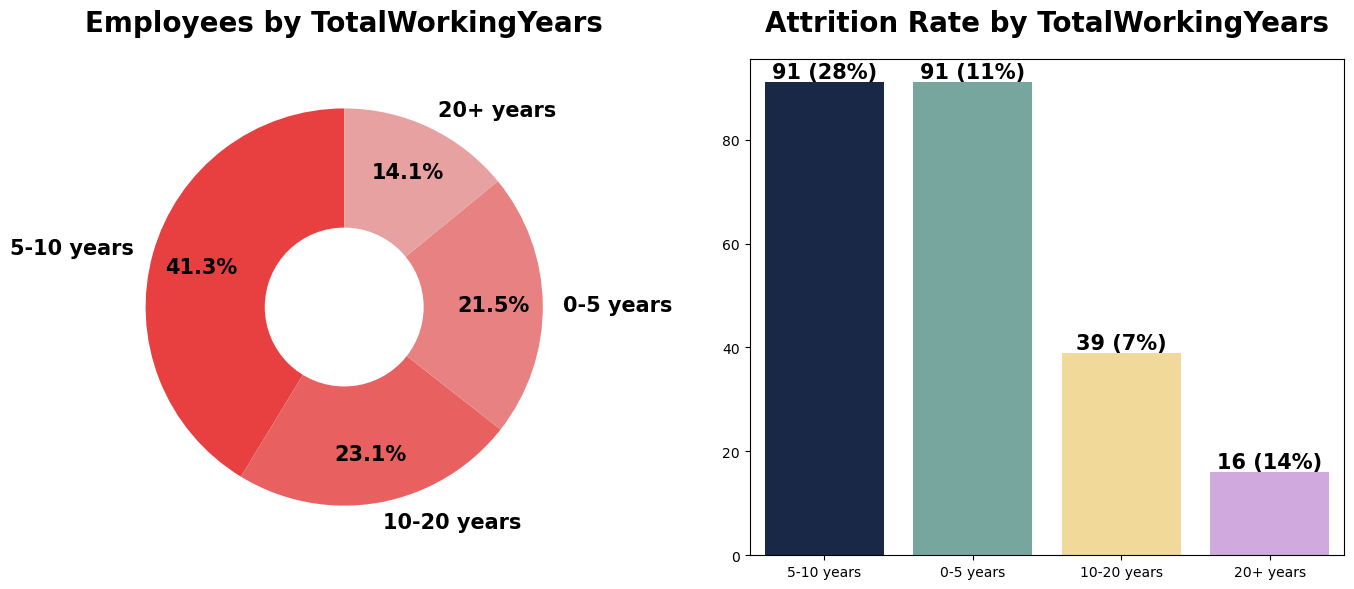

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Employee Attrition Analysis") \
    .getOrCreate()

# Assuming employee_data is your Spark DataFrame
# Define the bin edges for the groups
bin_edges = [0, 5, 10, 20, 50]

# Define the labels for the groups
bin_labels = ['0-5 years', '5-10 years', '10-20 years', '20+ years']

# Cut the TotalWorkingYears column into groups in PySpark DataFrame
employee_data = employee_data.withColumn("TotalWorkingYearsGroup",
                                         F.when((F.col('TotalWorkingYears') >= 0) & (F.col('TotalWorkingYears') <= 5), '0-5 years')
                                         .when((F.col('TotalWorkingYears') > 5) & (F.col('TotalWorkingYears') <= 10), '5-10 years')
                                         .when((F.col('TotalWorkingYears') > 10) & (F.col('TotalWorkingYears') <= 20), '10-20 years')
                                         .when(F.col('TotalWorkingYears') > 20, '20+ years')
                                         .otherwise('Unknown'))

# Convert to Pandas DataFrame for visualization
employee_data_pd = employee_data.toPandas()

# Visualization to show Total Employees by TotalWorkingYearsGroup
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = employee_data_pd["TotalWorkingYearsGroup"].value_counts()
plt.title("Employees by TotalWorkingYears", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
        colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'], textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Visualization to show Attrition Rate by TotalWorkingYearsGroup
plt.subplot(1,2,2)
new_df = employee_data_pd[employee_data_pd["Attrition"]=="Yes"]
value_2 = new_df["TotalWorkingYearsGroup"].value_counts()
attrition_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values, palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Attrition Rate by TotalWorkingYears", fontweight="black", size=20, pad=20)
for index, value in enumerate(value_2):
    plt.text(index, value, str(value)+" ("+str(int(attrition_rate[index]))+"%)", ha="center", va="bottom",
             size=15, fontweight="black")
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY YEARS AT COMPANY.

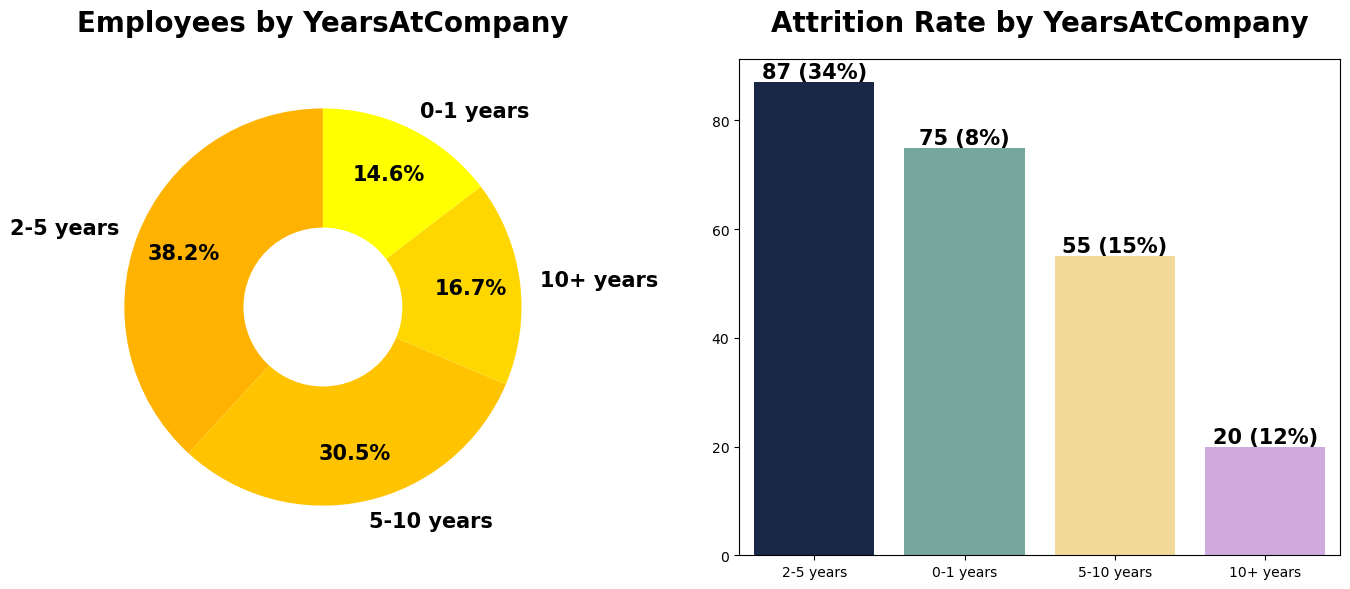

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Employee Attrition Analysis") \
    .getOrCreate()

# Assuming employee_data is your PySpark DataFrame
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']

# Cut the YearsAtCompany column into groups in PySpark DataFrame
employee_data = employee_data.withColumn("YearsAtCompanyGroup",
                                         F.when((F.col('YearsAtCompany') >= 0) & (F.col('YearsAtCompany') <= 1), '0-1 years')
                                         .when((F.col('YearsAtCompany') > 1) & (F.col('YearsAtCompany') <= 5), '2-5 years')
                                         .when((F.col('YearsAtCompany') > 5) & (F.col('YearsAtCompany') <= 10), '5-10 years')
                                         .when(F.col('YearsAtCompany') > 10, '10+ years')
                                         .otherwise('Unknown'))

# Convert PySpark DataFrame to Pandas DataFrame
employee_data_pd = employee_data.toPandas()

# Visualization to show Total Employees by YearsAtCompanyGroup
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
value_1 = employee_data_pd["YearsAtCompanyGroup"].value_counts()
plt.title("Employees by YearsAtCompany", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'], textprops={"fontweight": "black", "size": 15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Visualization to show Attrition Rate by YearsAtCompanyGroup
plt.subplot(1, 2, 2)
new_df = employee_data_pd[employee_data_pd["Attrition"] == "Yes"]
value_2 = new_df["YearsAtCompanyGroup"].value_counts()
attrition_rate = np.floor((value_2 / value_1) * 100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values, palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Attrition Rate by YearsAtCompany", fontweight="black", size=20, pad=20)
for index, value in enumerate(value_2):
    plt.text(index, value, str(value)+" ("+str(int(attrition_rate[index]))+"%)", ha="center", va="bottom",
             size=15, fontweight="black")
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY YEARS IN CURRENT ROLE.

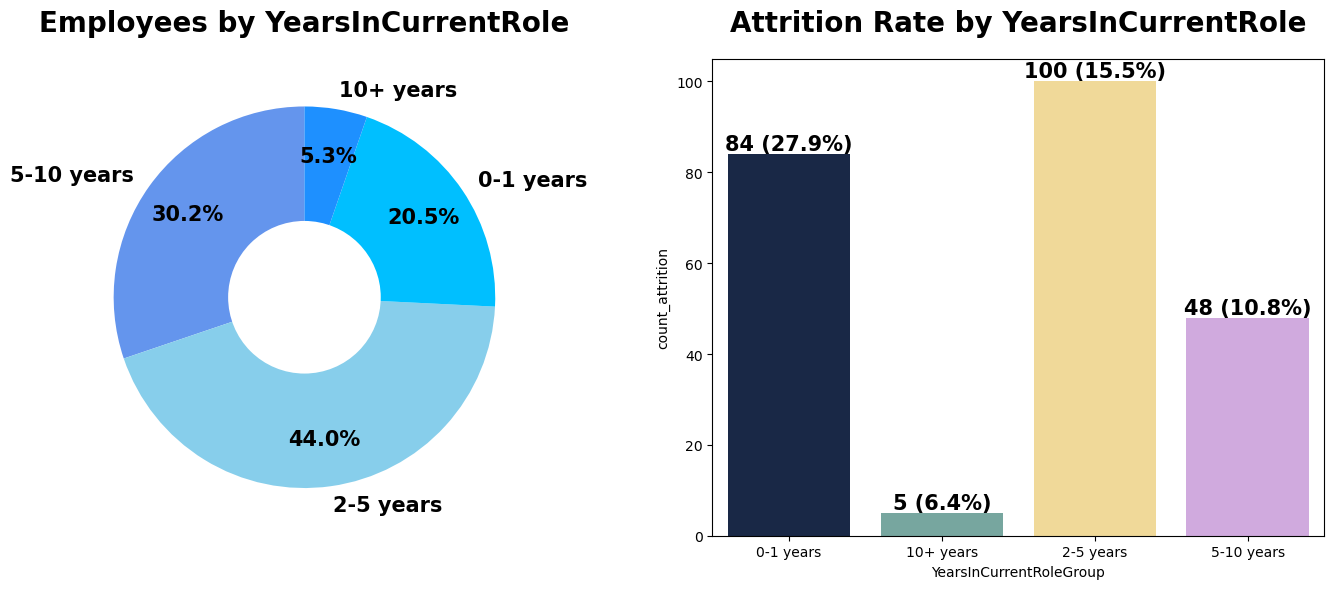

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Employee Attrition Analysis") \
    .getOrCreate()

# Assuming employee_data is your PySpark DataFrame
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']

# Cut the YearsInCurrentRole column into groups in PySpark DataFrame
employee_data = employee_data.withColumn("YearsInCurrentRoleGroup",
                                         F.when((F.col('YearsInCurrentRole') >= 0) & (F.col('YearsInCurrentRole') <= 1), '0-1 years')
                                         .when((F.col('YearsInCurrentRole') > 1) & (F.col('YearsInCurrentRole') <= 5), '2-5 years')
                                         .when((F.col('YearsInCurrentRole') > 5) & (F.col('YearsInCurrentRole') <= 10), '5-10 years')
                                         .when(F.col('YearsInCurrentRole') > 10, '10+ years')
                                         .otherwise('Unknown'))

# Aggregate counts of employees by YearsInCurrentRoleGroup
group_sizes = employee_data.groupBy("YearsInCurrentRoleGroup").count().toPandas()

# Calculate attrition rate by YearsInCurrentRoleGroup
attrition_data = employee_data.filter(employee_data["Attrition"] == "Yes") \
    .groupBy("YearsInCurrentRoleGroup").count().toPandas()

# Merge to ensure all groups are represented even if attrition count is zero
attrition_data = pd.merge(group_sizes, attrition_data, on="YearsInCurrentRoleGroup", how="left", suffixes=('_total', '_attrition'))

# Calculate attrition rate percentage
attrition_data["AttritionRate"] = (attrition_data["count_attrition"] / attrition_data["count_total"]) * 100
attrition_data["AttritionRate"] = attrition_data["AttritionRate"].fillna(0)

# Sort by bin labels
attrition_data.sort_values(by="YearsInCurrentRoleGroup", inplace=True, ignore_index=True)

# Visualization
plt.figure(figsize=(14, 6))

# Total Employees by YearsInCurrentRoleGroup
plt.subplot(1, 2, 1)
plt.title("Employees by YearsInCurrentRole", fontweight="black", size=20, pad=20)
plt.pie(group_sizes["count"], labels=group_sizes["YearsInCurrentRoleGroup"], autopct="%.1f%%", pctdistance=0.75,
        startangle=90, colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'], textprops={"fontweight": "black", "size": 15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Attrition Rate by YearsInCurrentRoleGroup
plt.subplot(1, 2, 2)
sns.barplot(x=attrition_data["YearsInCurrentRoleGroup"], y=attrition_data["count_attrition"],
            palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Attrition Rate by YearsInCurrentRole", fontweight="black", size=20, pad=20)
for index, row in attrition_data.iterrows():
    plt.text(index, row["count_attrition"], f"{row['count_attrition']} ({row['AttritionRate']:.1f}%)",
             ha="center", va="bottom", size=15, fontweight="black")
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY YEARS SINCE LAST PROMOTION.

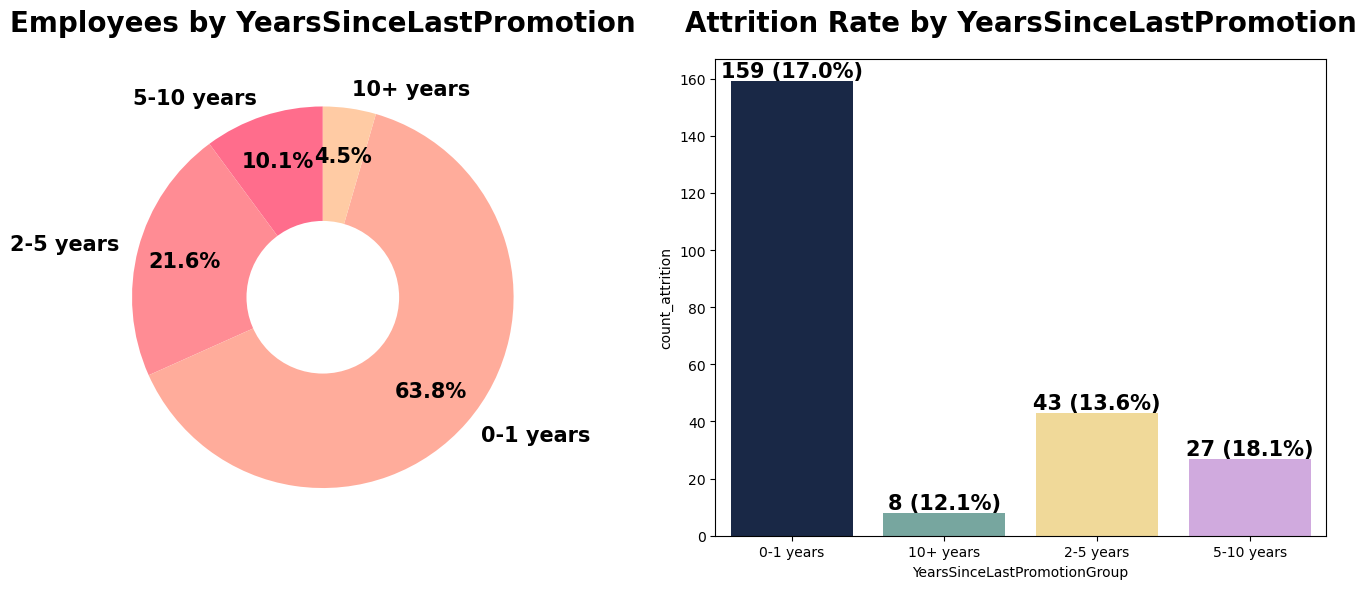

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Employee Attrition Analysis") \
    .getOrCreate()

# Assuming employee_data is your PySpark DataFrame
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']

# Cut the YearsSinceLastPromotion column into groups in PySpark DataFrame
employee_data = employee_data.withColumn("YearsSinceLastPromotionGroup",
                                         F.when((F.col('YearsSinceLastPromotion') >= 0) & (F.col('YearsSinceLastPromotion') <= 1), '0-1 years')
                                         .when((F.col('YearsSinceLastPromotion') > 1) & (F.col('YearsSinceLastPromotion') <= 5), '2-5 years')
                                         .when((F.col('YearsSinceLastPromotion') > 5) & (F.col('YearsSinceLastPromotion') <= 10), '5-10 years')
                                         .when(F.col('YearsSinceLastPromotion') > 10, '10+ years')
                                         .otherwise('Unknown'))

# Aggregate counts of employees by YearsSinceLastPromotionGroup
group_sizes = employee_data.groupBy("YearsSinceLastPromotionGroup").count().toPandas()

# Calculate attrition rate by YearsSinceLastPromotionGroup
attrition_data = employee_data.filter(employee_data["Attrition"] == "Yes") \
    .groupBy("YearsSinceLastPromotionGroup").count().toPandas()

# Merge to ensure all groups are represented even if attrition count is zero
attrition_data = pd.merge(group_sizes, attrition_data, on="YearsSinceLastPromotionGroup", how="left", suffixes=('_total', '_attrition'))

# Calculate attrition rate percentage
attrition_data["AttritionRate"] = (attrition_data["count_attrition"] / attrition_data["count_total"]) * 100
attrition_data["AttritionRate"] = attrition_data["AttritionRate"].fillna(0)

# Sort by bin labels
attrition_data.sort_values(by="YearsSinceLastPromotionGroup", inplace=True, ignore_index=True)

# Visualization
plt.figure(figsize=(14, 6))

# Total Employees by YearsSinceLastPromotionGroup
plt.subplot(1, 2, 1)
plt.title("Employees by YearsSinceLastPromotion", fontweight="black", size=20, pad=20)
plt.pie(group_sizes["count"], labels=group_sizes["YearsSinceLastPromotionGroup"], autopct="%.1f%%", pctdistance=0.75,
        startangle=90, colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'], textprops={"fontweight": "black", "size": 15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Attrition Rate by YearsSinceLastPromotionGroup
plt.subplot(1, 2, 2)
sns.barplot(x=attrition_data["YearsSinceLastPromotionGroup"], y=attrition_data["count_attrition"],
            palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Attrition Rate by YearsSinceLastPromotion", fontweight="black", size=20, pad=20)
for index, row in attrition_data.iterrows():
    plt.text(index, row["count_attrition"], f"{row['count_attrition']} ({row['AttritionRate']:.1f}%)",
             ha="center", va="bottom", size=15, fontweight="black")
plt.tight_layout()
plt.show()


## ANALYZING EMPLOYEE ATTRITION BY YEARS WITH CURRENT MANAGER.

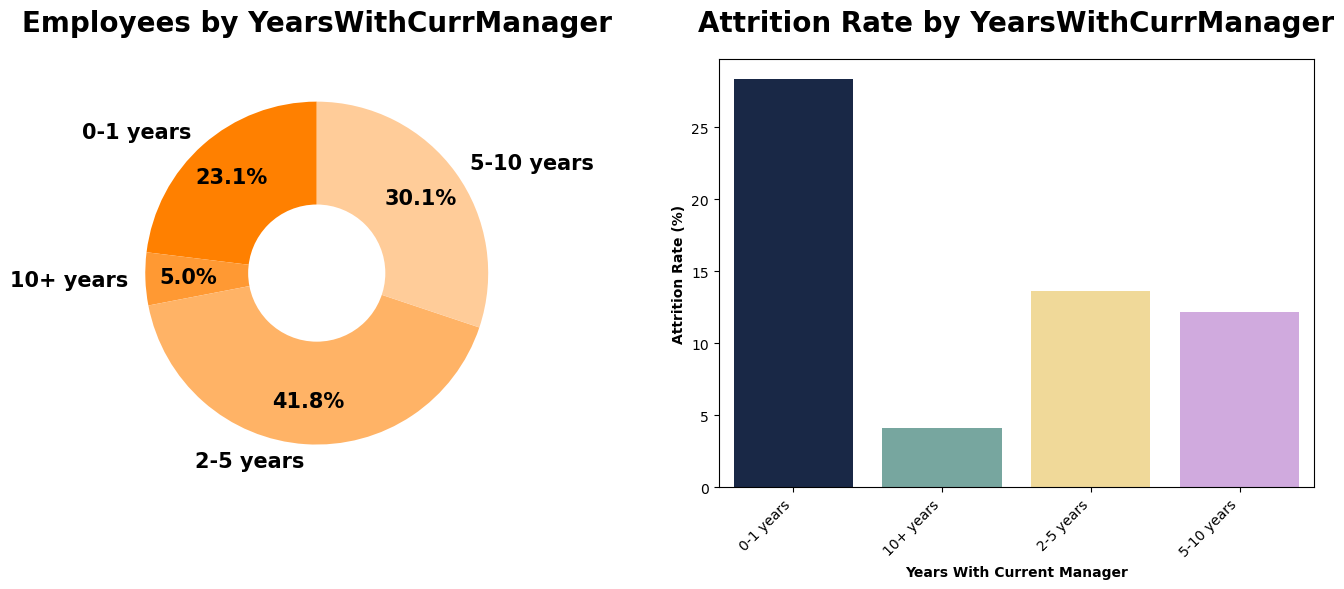

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already imported necessary libraries and initialized SparkSession as `spark`

# Define the bin edges and labels
bin_edges = [0, 1, 5, 10, 20]
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the YearsWithCurrManager column into groups
employee_data = employee_data.withColumn("YearsWithCurrManagerGroup", 
                                         F.when(F.col('YearsWithCurrManager').between(0, 1), '0-1 years')
                                         .when(F.col('YearsWithCurrManager').between(2, 5), '2-5 years')
                                         .when(F.col('YearsWithCurrManager').between(6, 10), '5-10 years')
                                         .when(F.col('YearsWithCurrManager') > 10, '10+ years')
                                         .otherwise('Unknown'))

# Aggregate counts for total employees by group
value_1_spark = employee_data.groupBy("YearsWithCurrManagerGroup").count().orderBy("YearsWithCurrManagerGroup")

# Aggregate counts for attrition employees by group
attrition_count_spark = employee_data.filter(employee_data["Attrition"] == "Yes") \
                                    .groupBy("YearsWithCurrManagerGroup").count().orderBy("YearsWithCurrManagerGroup")

# Convert to Pandas for local plotting
value_1_pd = value_1_spark.toPandas()
attrition_count_pd = attrition_count_spark.toPandas()

# Calculate attrition rate
attrition_rate = (attrition_count_pd["count"] / value_1_pd["count"]) * 100
attrition_count_pd["AttritionRate"] = attrition_rate

# Plotting with Matplotlib and Seaborn
plt.figure(figsize=(14, 6))

# Total Employees
plt.subplot(1, 2, 1)
plt.pie(value_1_pd["count"], labels=value_1_pd["YearsWithCurrManagerGroup"], autopct="%.1f%%", pctdistance=0.75,
        startangle=90, colors=['#FF8000', '#FF9933', '#FFB366', '#FFCC99'], textprops={"fontweight": "bold", "size": 15})
plt.title("Employees by YearsWithCurrManager", fontweight="bold", size=20, pad=20)
center_circle = plt.Circle((0, 0), 0.4, fc='white')
plt.gca().add_artist(center_circle)

# Attrition Rate
plt.subplot(1, 2, 2)
sns.barplot(x=attrition_count_pd["YearsWithCurrManagerGroup"], y=attrition_count_pd["AttritionRate"],
            palette=["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"])
plt.title("Attrition Rate by YearsWithCurrManager", fontweight="bold", size=20, pad=20)
plt.ylabel("Attrition Rate (%)", fontweight="bold")
plt.xlabel("Years With Current Manager", fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## LABEL ENCODING

In [104]:
from pyspark.ml.feature import StringIndexer

# Create StringIndexer for the Attrition column
indexer = StringIndexer(inputCol="Attrition", outputCol="AttritionIndex")
employee_data = indexer.fit(employee_data).transform(employee_data)

# Show the transformed DataFrame with the new numerical column
employee_data.select("Attrition", "AttritionIndex").show(5)


+---------+--------------+
|Attrition|AttritionIndex|
+---------+--------------+
|      Yes|           1.0|
|       No|           0.0|
|      Yes|           1.0|
|       No|           0.0|
|       No|           0.0|
+---------+--------------+
only showing top 5 rows



In [105]:
employee_data.describe().show()


+-------+------------------+---------+--------------+------------------+---------------+----------------+------------------+----------------+-------------+-----------------+-----------------------+------+------------------+------------------+------------------+--------------------+------------------+-------------+-----------------+------------------+------------------+------+--------+------------------+-------------------+------------------------+-------------+------------------+------------------+---------------------+------------------+------------------+------------------+-----------------------+--------------------+----------------------+-------------------+-----------------------+----------------------------+-------------------------+-------------------+
|summary|               Age|Attrition|BusinessTravel|         DailyRate|     Department|DistanceFromHome|         Education|  EducationField|EmployeeCount|   EmployeeNumber|EnvironmentSatisfaction|Gender|        HourlyRate|    Job

## DATA PROCESSING

In [111]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Assuming 'employee_data' is already a PySpark DataFrame

# List of column names excluding 'Attrition'
cols_excluding_attrition = [col for col in employee_data.columns if col != 'Attrition']

# List of categorical columns with fewer than 20 unique values
categorical_cols = [col for col in cols_excluding_attrition if employee_data.select(col).distinct().count() > 1]

# Create a list to store StringIndexer stages
indexers = []

# Loop through each categorical column and create StringIndexer
for col in categorical_cols:
    indexer = StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid='skip')
    indexers.append(indexer)

# Create a list to store OneHotEncoder stages
encoders = []

# Loop through each indexed column and create OneHotEncoder
for indexer in indexers:
    encoder = OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=f"{indexer.getOutputCol()}_encoded")
    encoders.append(encoder)

# Assemble all encoded columns into a single feature vector
input_cols = [encoder.getOutputCol() for encoder in encoders]
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")

# Pipeline stages
stages = indexers + encoders + [assembler]

# Create a pipeline
pipeline = Pipeline(stages=stages)

# Fit the pipeline to the data
pipeline_model = pipeline.fit(employee_data)

# Transform the data with the pipeline
final_data = pipeline_model.transform(employee_data)

# Select relevant columns (including 'Attrition')
selected_cols = ["features", "Attrition"]
final_data = final_data.select(selected_cols)

# Show final schema and shape of the data
final_data.printSchema()
print((final_data.count(), len(final_data.columns)))


root
 |-- features: vector (nullable = true)
 |-- Attrition: string (nullable = true)

(1470, 2)


In [120]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

# Assuming 'spark' is your SparkSession instance and 'employee_data' is your PySpark DataFrame

# List of all columns in the DataFrame
all_columns = employee_data.columns

# List of categorical columns (excluding 'Attrition')
categorical_cols = [col for col in all_columns if col != 'Attrition' and employee_data.select(col).distinct().count() < 20]

# Create a list to store StringIndexer stages
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="skip") for col in categorical_cols]

# Fit StringIndexers on the data
indexer_model = [indexer.fit(employee_data) for indexer in indexers]

# Transform the data with StringIndexers
indexed_data = employee_data
for model in indexer_model:
    indexed_data = model.transform(indexed_data)

# List to store OneHotEncoder stages
encoders = [OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encoded") for col in categorical_cols]

# Initialize a Pipeline with encoders
pipeline = Pipeline(stages=indexers + encoders)

# Fit the pipeline to the data
pipeline_model = pipeline.fit(indexed_data)

# Transform the data with the pipeline
encoded_data = pipeline_model.transform(indexed_data)

# Select relevant columns (including 'Attrition' if needed)
selected_cols = [col for col in encoded_data.columns if col == 'Attrition' or col.endswith("_encoded")]

# Select only relevant columns
final_data = encoded_data.select(selected_cols)

# Show the schema and summary of the transformed data
final_data.printSchema()
final_data.show(5)


IllegalArgumentException: requirement failed: Output column BusinessTravel_index already exists.

In [121]:
# Remove duplicate columns (features)
final_data = final_data.select([col for col in final_data.columns if col not in categorical_cols])

# Remove duplicate rows
final_data = final_data.dropDuplicates()

# Print the shape of the final dataset (number of rows and columns)
print((final_data.count(), len(final_data.columns)))

# Note: Correlation analysis can be more complex in PySpark and may require specific aggregation and transformation steps.


(1470, 2)


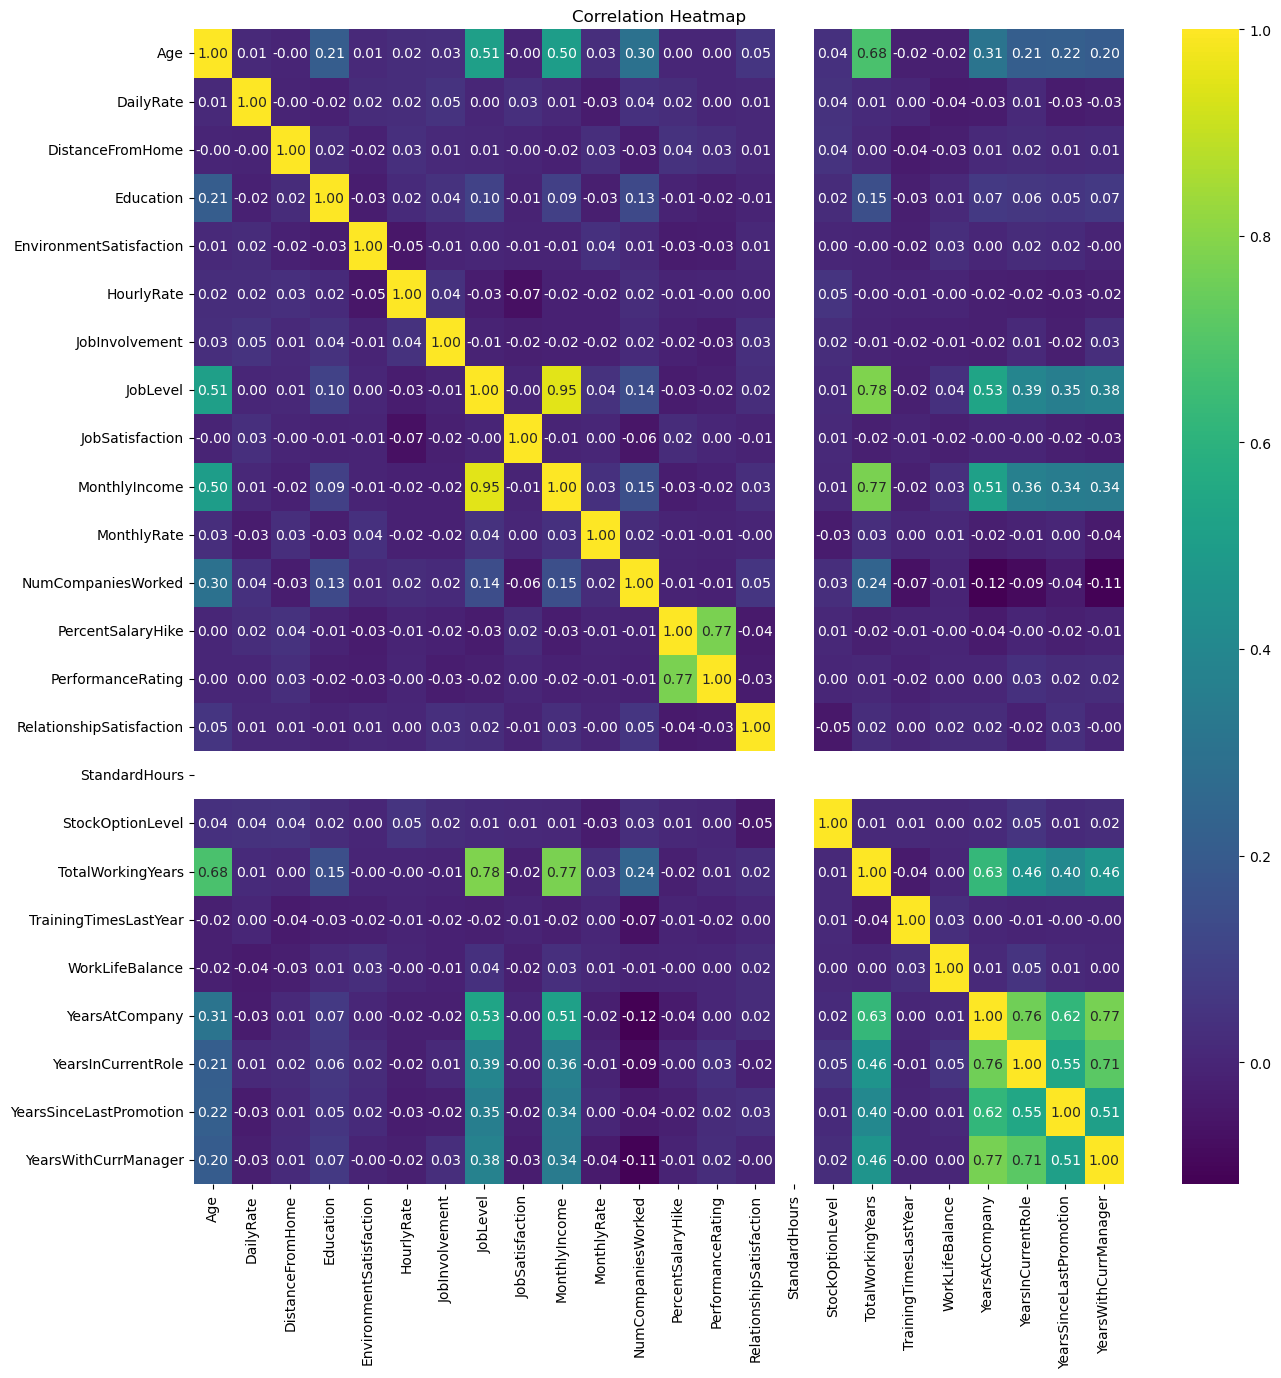

In [124]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import corr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Initialize Spark session
spark = SparkSession.builder.appName("AttritionAnalysis").getOrCreate()

# Load data
data_path = 'C:/Users/basan/Downloads/WA_Fn-UseC_-HR-Employee-Attrition (2).csv'
data = spark.read.csv(data_path, header=True, inferSchema=True)

# Select relevant columns
X = data.select(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
                 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
                 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

# Compute correlation matrix
correlation_matrix = pd.DataFrame(X.toPandas().corr())

# Plot heatmap using seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [125]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

# Initialize Spark session
spark = SparkSession.builder.appName("AttritionAnalysis").getOrCreate()

# Load data
data_path = 'C:/Users/basan/Downloads/WA_Fn-UseC_-HR-Employee-Attrition (2).csv'
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Selecting features and target
features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
            'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
            'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
            'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'YearsWithCurrManager']

target = 'Attrition'

# Vectorize features
assembler = VectorAssembler(inputCols=features, outputCol='features')
df = assembler.transform(df)

# Convert Attrition column from string to numeric
indexer = StringIndexer(inputCol=target, outputCol='label')
df = indexer.fit(df).transform(df)

# Split data into training and test sets
train_df, test_df = df.randomSplit([0.7, 0.3], seed=0)

# Logistic Regression model
lr = LogisticRegression(featuresCol='features', labelCol='label', maxIter=10000, regParam=0.0)

# Fit the model
lr_model = lr.fit(train_df)

# Predictions on training and test data
train_predictions = lr_model.transform(train_df)
test_predictions = lr_model.transform(test_df)

# Evaluate model accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='label', metricName='accuracy')
train_accuracy = evaluator.evaluate(train_predictions)
test_accuracy = evaluator.evaluate(test_predictions)

# Print results
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Training Model accuracy score: {:.3f}'.format(train_accuracy))
print('Test Model accuracy score: {:.3f}'.format(test_accuracy))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Training Model accuracy score: 0.849
Test Model accuracy score: 0.872
--------------------------------------------------------------------------


## TRAIN AND TEST DATASET

In [145]:
train_data_spark, test_data_spark = employee_data_spark.randomSplit([0.7, 0.3], seed=42)

In [150]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Spark session with Python executable path
spark = SparkSession.builder \
    .appName("HR_Analytics") \
    .config("spark.pyspark.python", "python") \
    .config("spark.pyspark.driver.python", "python") \
    .getOrCreate()

# Load data
df = spark.read.csv('C:/Users/basan/Downloads/WA_Fn-UseC_-HR-Employee-Attrition (2).csv', header=True, inferSchema=True)

# Convert binary categorical columns to numeric using StringIndexer
binary_cols = ['Attrition', 'OverTime', 'Gender']
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index") for col in binary_cols]

# Convert multi-class categorical columns to one-hot encoded vectors
multi_class_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
indexers += [StringIndexer(inputCol=col, outputCol=col+"_index") for col in multi_class_cols]
encoders = [OneHotEncoder(inputCol=col+"_index", outputCol=col+"_vec") for col in multi_class_cols]

# Combine all stages into a single pipeline
pipeline = Pipeline(stages=indexers + encoders)
transformed_data = pipeline.fit(df).transform(df)

# Show the transformed data to verify column names
transformed_data.show(5)

# Assemble features into a single vector
assembler = VectorAssembler(
    inputCols=[col+"_index" for col in binary_cols] + [col+"_vec" for col in multi_class_cols] + ['Age'],
    outputCol="features"
)
assembled_data = assembler.transform(transformed_data)

# Convert the vector into individual columns
from pyspark.ml.linalg import DenseVector
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, DoubleType

def vector_to_array(v):
    return v.toArray().tolist()

vector_to_array_udf = udf(vector_to_array, ArrayType(DoubleType()))
final_data = assembled_data.withColumn("features_array", vector_to_array_udf("features"))

# Extract individual features into separate columns
num_features = len(final_data.select("features_array").first()[0])
feature_cols = [f"feature_{i}" for i in range(num_features)]
for i in range(num_features):
    final_data = final_data.withColumn(feature_cols[i], final_data["features_array"].getItem(i))

# Select the final columns for correlation analysis
final_selected_cols = feature_cols + ["Attrition_index"]
final_selected_data = final_data.select(final_selected_cols)

# Calculate correlations using Pearson method
correlations = {}
for col in feature_cols:
    correlations[col] = final_selected_data.stat.corr('Attrition_index', col)

# Convert correlations to pandas DataFrame for plotting
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

# Plot the correlations using matplotlib
plt.figure(figsize=(20, 10))
corr_df['Correlation'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with Attrition')
plt.show()


# Convert binary categorical columns to numeric using StringIndexer
binary_cols = ['Attrition', 'OverTime', 'Gender']
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index") for col in binary_cols]

# Convert multi-class categorical columns to one-hot encoded vectors
multi_class_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
indexers += [StringIndexer(inputCol=col, outputCol=col+"_index") for col in multi_class_cols]
encoders = [OneHotEncoder(inputCol=col+"_index", outputCol=col+"_vec") for col in multi_class_cols]

# Combine all stages into a single pipeline
pipeline = Pipeline(stages=indexers + encoders)
transformed_data = pipeline.fit(df).transform(df)

# Show the transformed data to verify column names
transformed_data.show(5)

# Assemble features into a single vector
assembler = VectorAssembler(
    inputCols=[col+"_index" for col in binary_cols] + [col+"_vec" for col in multi_class_cols] + ['Age'],
    outputCol="features"
)
assembled_data = assembler.transform(transformed_data)

# Convert the vector into individual columns
from pyspark.ml.linalg import DenseVector
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, DoubleType

def vector_to_array(v):
    return v.toArray().tolist()

vector_to_array_udf = udf(vector_to_array, ArrayType(DoubleType()))
final_data = assembled_data.withColumn("features_array", vector_to_array_udf("features"))

# Extract individual features into separate columns
num_features = len(final_data.select("features_array").first()[0])
feature_cols = [f"feature_{i}" for i in range(num_features)]
for i in range(num_features):
    final_data = final_data.withColumn(feature_cols[i], final_data["features_array"].getItem(i))

# Select the final columns for correlation analysis
final_selected_cols = feature_cols + ["Attrition_index"]
final_selected_data = final_data.select(final_selected_cols)

# Calculate correlations using Pearson method
correlations = {}
for col in feature_cols:
    correlations[col] = final_selected_data.stat.corr('Attrition_index', col)

# Convert correlations to pandas DataFrame for plotting
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

# Plot the correlations using matplotlib
plt.figure(figsize=(20, 10))
corr_df['Correlation'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with Attrition')
plt.show()


+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+---------------+--------------+------------+--------------------+----------------+--------------------+-------------+-------------------+------------------+--------------+------------------+-------------+-----------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction

Py4JJavaError: An error occurred while calling o26843.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 3954.0 failed 1 times, most recent failure: Lost task 0.0 in stage 3954.0 (TID 2240) (DESKTOP-KMCPS3J executor driver): java.io.IOException: Cannot run program "python3": CreateProcess error=2, The system cannot find the file specified
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1048)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:181)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:54)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:131)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:858)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.io.IOException: CreateProcess error=2, The system cannot find the file specified
	at java.lang.ProcessImpl.create(Native Method)
	at java.lang.ProcessImpl.<init>(ProcessImpl.java:458)
	at java.lang.ProcessImpl.start(ProcessImpl.java:139)
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1029)
	... 28 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:4148)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:4145)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.io.IOException: Cannot run program "python3": CreateProcess error=2, The system cannot find the file specified
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1048)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:181)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:54)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:131)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:858)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.io.IOException: CreateProcess error=2, The system cannot find the file specified
	at java.lang.ProcessImpl.create(Native Method)
	at java.lang.ProcessImpl.<init>(ProcessImpl.java:458)
	at java.lang.ProcessImpl.start(ProcessImpl.java:139)
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1029)
	... 28 more


In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, lit
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize Spark session
spark = SparkSession.builder.appName("Employee Attrition Analysis").getOrCreate()

# Load the data
employee_data_spark = spark.createDataFrame(data)

# Identify categorical columns
categorical_cols = [col for col in employee_data_spark.columns if col != 'Attrition' and employee_data_spark.select(col).distinct().count() < 20]

# Index and encode categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index").fit(employee_data_spark) for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_ohe") for col in categorical_cols]

# Assemble features
feature_cols = [col for col in employee_data_spark.columns if col != 'Attrition' and col not in categorical_cols] + [col + "_ohe" for col in categorical_cols]
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Index the label column
label_indexer = StringIndexer(inputCol="Attrition", outputCol="indexedAttrition")

# Standardize the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

# Initialize the classifier
rf = RandomForestClassifier(labelCol="indexedAttrition", featuresCol="scaled_features", numTrees=100, maxDepth=4, seed=42)

# Create a pipeline
pipeline = Pipeline(stages=indexers + encoders + [label_indexer, vector_assembler, scaler, rf])

# Split data into train and test sets
train_data_spark, test_data_spark = employee_data_spark.randomSplit([0.7, 0.3], seed=42)

# Train the model
model = pipeline.fit(train_data_spark)

# Make predictions
predictions_train = model.transform(train_data_spark)
predictions_test = model.transform(test_data_spark)

# Evaluate model
evaluator = MulticlassClassificationEvaluator(labelCol="indexedAttrition", predictionCol="prediction", metricName="accuracy")

train_accuracy = evaluator.evaluate(predictions_train)
test_accuracy = evaluator.evaluate(predictions_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Feature importances
rf_model = model.stages[-1]
feature_importances = rf_model.featureImportances.toArray()

# Extract feature names
input_cols = vector_assembler.getInputCols()
ohe_cols = [enc.getOutputCol() for enc in encoders]
feature_names = []
for col in input_cols:
    if col in ohe_cols:
        categories = rf_model.stages[[enc.getOutputCol() for enc in encoders].index(col)].labels
        feature_names.extend([f"{col}_{category}" for category in categories])
    else:
        feature_names.append(col)

# Create a DataFrame for feature importances
feature_imp_df = pd.DataFrame({"feature": feature_names, "importance": feature_importances})
feature_imp_df = feature_imp_df.sort_values(by="importance", ascending=False)

print(feature_imp_df)

# Proportion of the majority class
def calculate_class_proportion(data_spark):
    class_counts = data_spark.groupBy("indexedAttrition").agg(count("*").alias("count")).collect()
    total_count = sum(row['count'] for row in class_counts)
    majority_class_count = max(row['count'] for row in class_counts)
    majority_class_proportion = majority_class_count / total_count
    return majority_class_proportion

train_majority_class_proportion = calculate_class_proportion(train_data_spark)
test_majority_class_proportion = calculate_class_proportion(test_data_spark)

print(f"Training majority class proportion: {train_majority_class_proportion}")
print(f"Test majority class proportion: {test_majority_class_proportion}")

# Define evaluation function
def evaluate(model, train_data, test_data):
    predictions_train = model.transform(train_data)
    predictions_test = model.transform(test_data)

    train_accuracy = evaluator.evaluate(predictions_train)
    test_accuracy = evaluator.evaluate(predictions_test)

    print("TRAINING RESULTS: \n===============================")
    print(f"


## LOGISTIC REGRESSION

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

# Assuming you have split your data into X_train, X_test, y_train, y_test and standardized X_train_std, X_test_std

# Initialize and fit the Logistic Regression model
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

# Function to evaluate the model
def evaluate(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
    print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
    print('Train Confusion Matrix:\n', confusion_matrix(y_train, y_train_pred))
    print('Test Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
    print('Train Precision:', precision_score(y_train, y_train_pred))
    print('Test Precision:', precision_score(y_test, y_test_pred))
    print('Train Recall:', recall_score(y_train, y_train_pred))
    print('Test Recall:', recall_score(y_test, y_test_pred))

# Evaluate the model
evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

# Function to plot precision-recall vs threshold
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

# Calculate precision-recall curve
y_scores = lr_clf.decision_function(X_test_std)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Plot precision-recall vs threshold
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# Plot precision-recall curve
plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: Precision/Recall Tradeoff")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot ROC curve
plt.subplot(4, 2, 3)
plot_roc_curve(fpr, tpr)

# Calculate and display ROC AUC scores
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.decision_function(X_train_std)),
        'Test': roc_auc_score(y_test, y_scores),
    },
}

print(scores_dict)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.linalg import DenseVector

# Initialize Spark session
spark = SparkSession.builder.appName("Employee Attrition Analysis").getOrCreate()

# Load the data
employee_data_spark = spark.createDataFrame(data)

# Identify categorical columns
categorical_cols = [col for col in employee_data_spark.columns if col != 'Attrition' and employee_data_spark.select(col).distinct().count() < 20]

# Index and encode categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index").fit(employee_data_spark) for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_ohe") for col in categorical_cols]

# Assemble features
feature_cols = [col for col in employee_data_spark.columns if col != 'Attrition' and col not in categorical_cols] + [col + "_ohe" for col in categorical_cols]
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Index the label column
label_indexer = StringIndexer(inputCol="Attrition", outputCol="indexedAttrition")

# Standardize the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

# Initialize the classifier
rf = RandomForestClassifier(labelCol="indexedAttrition", featuresCol="scaled_features", numTrees=100, bootstrap=False)

# Create a pipeline
pipeline = Pipeline(stages=indexers + encoders + [label_indexer, vector_assembler, scaler, rf])

# Split data into train and test sets
train_data_spark, test_data_spark = employee_data_spark.randomSplit([0.7, 0.3], seed=42)

# Train the model
model = pipeline.fit(train_data_spark)

# Make predictions
predictions_train = model.transform(train_data_spark)
predictions_test = model.transform(test_data_spark)

# Evaluate model
evaluator = BinaryClassificationEvaluator(labelCol="indexedAttrition", rawPredictionCol="prediction", metricName="areaUnderROC")

train_auc = evaluator.evaluate(predictions_train)
test_auc = evaluator.evaluate(predictions_test)

print(f"Training AUC: {train_auc}")
print(f"Test AUC: {test_auc}")

# Hyperparameter tuning
param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [100, 500, 900]) \
    .addGrid(rf.maxDepth, [2, 3, 5, 10, 15, None]) \
    .addGrid(rf.minInstancesPerNode, [2, 5, 10]) \
    .addGrid(rf.minWeightFractionPerNode, [1, 2, 4]) \
    .addGrid(rf.bootstrap, [True, False]) \
    .build()

crossval = CrossValidator(estimator=pipeline, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=5, parallelism=4)

# Fit cross-validation model
cv_model = crossval.fit(train_data_spark)

# Best model
best_model = cv_model.bestModel

# Predictions on test set with best model
best_predictions_test = best_model.transform(test_data_spark)
best_test_auc = evaluator.evaluate(best_predictions_test)

print(f"Best Test AUC: {best_test_auc}")

# Feature importances
rf_model = best_model.stages[-1]
feature_importances = rf_model.featureImportances.toArray()

# Extract feature names
input_cols = vector_assembler.getInputCols()
ohe_cols = [enc.getOutputCol() for enc in encoders]
feature_names = []
for col in input_cols:
    if col in ohe_cols:
        categories = rf_model.stages[[enc.getOutputCol() for enc in encoders].index(col)].labels
        feature_names.extend([f"{col}_{category}" for category in categories])
    else:
        feature_names.append(col)

# Create a DataFrame for feature importances
feature_imp_df = pd.DataFrame({"feature": feature_names, "importance": feature_importances})
feature_imp_df = feature_imp_df.sort_values(by="importance", ascending=False)

print(feature_imp_df)

# Plot feature importances
plt.figure(figsize=(10, 10))
feature_imp_df.set_index('feature').plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')
plt.show()

# Proportion of the majority class
def calculate_class_proportion(data_spark):
    class_counts = data_spark.groupBy("indexedAttrition").agg(count("*").alias("count")).collect()
    total_count = sum(row['count'] for row in class_counts)
    majority_class_count = max(row['count'] for row in class_counts)
    majority_class_proportion = majority_class_count / total_count
    return majority_class_proportion

train_majority_class_proportion = calculate_class_proportion(train_data_spark)
test_majority_class_proportion = calculate_class_proportion(test_data_spark)

print(f"Training majority class proportion: {train_majority_class_proportion}")
print(f"Test majority class proportion: {test_majority_class_proportion}")

# Define evaluation function
def evaluate(model, train_data, test_data):
    predictions_train = model.transform(train_data)
    predictions_test = model.transform(test_data)

    train_auc = evaluator.evaluate(predictions_train)
    test_auc = evaluator.evaluate(predictions_test)

    print("TRAINING RESULTS: \n===============================")
    print(f"CONFUSION MATRIX:\n{predictions_train.crosstab('indexedAttrition', 'prediction').show()}")
    print(f"ACCURACY SCORE:\n{train_auc:.4f}")

    print("TESTING RESULTS: \n===============================")
    print(f"CONFUSION MATRIX:\n{predictions_test.crosstab('indexedAttrition', 'prediction').show()}")
    print(f"ACCURACY SCORE:\n{test_auc:.4f}")

# Evaluate the model
evaluate(best_model, train_data_spark, test_data_spark)

# Plot Precision-Recall and ROC curves
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Extract prediction probabilities
probabilities = best_predictions_test.select("probability").rdd.map(lambda row: row[0]).collect()
y_test_pred = best_predictions_test.select("prediction").rdd.map(lambda row: row[0]).collect()

# Calculate precision and recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_pred)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr, tpr)

# Save the results
scores_dict['Random Forest'] = {
    'Train': train_auc,
    'Test': test_auc,
}


## SUPPORT VECTOR MACHINE

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.classification import LinearSVC, SVC
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.linalg import DenseVector
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("Employee Attrition Analysis").getOrCreate()

# Load the data into a Spark DataFrame
employee_data_spark = spark.createDataFrame(data)

# Assemble features
feature_cols = [col for col in employee_data_spark.columns if col != 'Attrition']
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Standardize the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

# Initialize the SVM classifier
svm = SVC(labelCol="Attrition", featuresCol="scaled_features", probabilityCol="probability")

# Create a pipeline
pipeline = Pipeline(stages=[vector_assembler, scaler, svm])

# Split data into train and test sets
train_data_spark, test_data_spark = employee_data_spark.randomSplit([0.7, 0.3], seed=42)

# Train the SVM model
model = pipeline.fit(train_data_spark)

# Make predictions
predictions_train = model.transform(train_data_spark)
predictions_test = model.transform(test_data_spark)

# Evaluate model
evaluator = BinaryClassificationEvaluator(labelCol="Attrition", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

train_auc = evaluator.evaluate(predictions_train)
test_auc = evaluator.evaluate(predictions_test)

print(f"Training AUC: {train_auc}")
print(f"Test AUC: {test_auc}")

# Hyperparameter tuning
param_grid = ParamGridBuilder() \
    .addGrid(svm.maxIter, [10, 50, 100]) \
    .addGrid(svm.regParam, [0.1, 0.01]) \
    .addGrid(svm.tol, [1e-3, 1e-4]) \
    .build()

crossval = CrossValidator(estimator=pipeline, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=3)

# Fit cross-validation model
cv_model = crossval.fit(train_data_spark)

# Best model
best_model = cv_model.bestModel

# Predictions on test set with best model
best_predictions_test = best_model.transform(test_data_spark)
best_test_auc = evaluator.evaluate(best_predictions_test)

print(f"Best Test AUC: {best_test_auc}")

# Plot Precision-Recall and ROC curves
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Extract prediction probabilities
probabilities = best_predictions_test.select("probability").rdd.map(lambda row: row[0][1]).collect()
y_test_pred = best_predictions_test.select("prediction").rdd.map(lambda row: row[0]).collect()

# Calculate precision and recall
precisions, recalls, thresholds = precision_recall_curve(y_test, probabilities)
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plot_roc_curve(fpr, tpr)

# Save the results
scores_dict['Support Vector Machine'] = {
    'Train': train_auc,
    'Test': test_auc,
}


## XGBOOST CLASSIFIER

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.classification import XGBoostClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("Employee Attrition Analysis").getOrCreate()

# Load the data into a Spark DataFrame
employee_data_spark = spark.createDataFrame(data)

# Assemble features
feature_cols = [col for col in employee_data_spark.columns if col != 'Attrition']
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Standardize the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

# Initialize the XGBoost classifier
xgb = XGBoostClassifier(labelCol="Attrition", featuresCol="scaled_features", predictionCol="prediction")

# Create a pipeline
pipeline = Pipeline(stages=[vector_assembler, scaler, xgb])

# Split data into train and test sets
train_data_spark, test_data_spark = employee_data_spark.randomSplit([0.7, 0.3], seed=42)

# Train the XGBoost model
model = pipeline.fit(train_data_spark)

# Make predictions
predictions_train = model.transform(train_data_spark)
predictions_test = model.transform(test_data_spark)

# Evaluate model
evaluator = BinaryClassificationEvaluator(labelCol="Attrition", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

train_auc = evaluator.evaluate(predictions_train)
test_auc = evaluator.evaluate(predictions_test)

print(f"Training AUC: {train_auc}")
print(f"Test AUC: {test_auc}")

# Extract prediction probabilities
probabilities = predictions_test.select("probability").rdd.map(lambda row: row[0][1]).collect()
y_test_pred = predictions_test.select("prediction").rdd.map(lambda row: row[0]).collect()

# Calculate precision and recall
precisions, recalls, thresholds = precision_recall_curve(y_test, probabilities)
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plot_roc_curve(fpr, tpr)

# Save the results
scores_dict['XGBoost'] = {
    'Train': train_auc,
    'Test': test_auc,
}

# Feature Importance
feature_importance = model.stages[-1].featureImportances
feature_names = feature_cols

# Create a DataFrame for feature importances
fi_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
fi_df = fi_df.sort_values(by='importance', ascending=False)[:35]

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(fi_df['feature'], fi_df['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance according to XGBoost')
plt.gca().invert_yaxis()
plt.show()


## LIGHTGBM CLASSIFIER

In [ ]:
pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
# Initialize and fit LightGBM classifier
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

# Evaluate model
evaluate(lgb_clf, X_train, X_test, y_train, y_test)

# Precision-Recall and ROC curves
precisions, recalls, thresholds = precision_recall_curve(y_test, lgb_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lgb_clf.predict_proba(X_test)[:, 1])
plot_roc_curve(fpr, tpr)

# Store results in scores_dict
scores_dict['LightGBM'] = {
        'Train': roc_auc_score(y_train, lgb_clf.predict_proba(X_train)[:, 1]),
        'Test': roc_auc_score(y_test, lgb_clf.predict_proba(X_test)[:, 1]),
    }

## CATBOOST CLASSIFIER

In [ ]:
pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

# Initialize and fit CatBoost classifier
cb_clf = CatBoostClassifier(verbose=0)
cb_clf.fit(X_train, y_train)

# Evaluate model
evaluate(cb_clf, X_train, X_test, y_train, y_test)

# Precision-Recall and ROC curves
precisions, recalls, thresholds = precision_recall_curve(y_test, cb_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, cb_clf.predict_proba(X_test)[:, 1])
plot_roc_curve(fpr, tpr)

# Store results in scores_dict
scores_dict['CatBoost'] = {
        'Train': roc_auc_score(y_train, cb_clf.predict_proba(X_train)[:, 1]),
        'Test': roc_auc_score(y_test, cb_clf.predict_proba(X_test)[:, 1]),
    }

## ADABOOST CLASSIFIER

In [ ]:


from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

# Initialize and fit AdaBoost classifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

# Evaluate model
evaluate(ab_clf, X_train, X_test, y_train, y_test)

# Precision-Recall and ROC curves
precisions, recalls, thresholds = precision_recall_curve(y_test, ab_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, ab_clf.predict_proba(X_test)[:, 1])
plot_roc_curve(fpr, tpr)

# Store results in scores_dict
scores_dict['AdaBoost'] = {
        'Train': roc_auc_score(y_train, ab_clf.predict_proba(X_train)[:, 1]),
        'Test': roc_auc_score(y_test, ab_clf.predict_proba(X_test)[:, 1]),
    }


## COMPARING MODEL PERFORMANCE

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dictionary of trained models
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
    'LightGBM': lgb_clf,
    'CatBoost': cb_clf,
    'AdaBoost': ab_clf
}

# Print ROC AUC scores for each model
for model_name, model in ml_models.items():
    # Calculate ROC AUC score for each model
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"{model_name.upper():{30}} ROC AUC Score: {roc_auc:.3f}")

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model_name, model in ml_models.items():
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
        # Predict probabilities for positive class
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function or predict
        y_pred_prob = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict(X_test)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    
    # Compute AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
